In [5]:
#importing requried libarries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.set_option("display.max_columns",None)

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#scipy
import scipy.stats as stats

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score

#for balancing the data
from imblearn.over_sampling import SMOTE
import warnings
from colorama import Fore, Back, Style

warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("./employee.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [8]:
print(Style.BRIGHT+ 'Checking Dataframe:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.head()

Checking Dataframe:
---------------------


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [9]:
print(Style.BRIGHT+ 'Dataframe information :' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.info()

Dataframe information :
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 n

In [10]:
print(Style.BRIGHT+ 'Dataframe Description:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.describe()

Dataframe Description:
---------------------


Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [11]:
print(Style.BRIGHT+ 'Checking null values:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.isnull().sum()

Checking null values:
---------------------


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
print(Style.BRIGHT+ 'Dataframe Dtypes:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)

pd.value_counts(df.dtypes)

Dataframe Dtypes:
---------------------


int64     26
object     9
dtype: int64

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
print(Style.BRIGHT+ 'Dataframe Columns:' + Style.RESET_ALL)
print(Style.BRIGHT+ '---------------------' + Style.RESET_ALL)
df.columns

Dataframe Columns:
---------------------


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
import pandas_summary as ps
dfs = ps.DataFrameSummary(df)
print('categoricals: ', dfs.categoricals.tolist())
print('numerics: ', dfs.numerics.tolist())
dfs.summary()

categoricals:  ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
numerics:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Age Attrition BusinessTravel   DailyRate   Department  \
count           1470.0       NaN            NaN      1470.0          NaN   
mean          36.92381       NaN            NaN  802.485714          NaN   
std           9.135373       NaN            NaN    403.5091          NaN   
min               18.0       NaN            NaN       102.0          NaN   
25%               30.0       NaN            NaN       465.0          NaN   
50%               36.0       NaN            NaN       802.0          NaN   
75%               43.0       NaN            NaN      1157.0          NaN   
max               60.0       NaN            NaN      1499.0          NaN   
counts            1470      1470           1470        1470         1470   
uniques             43         2              3         886            3   
missing              0         0              0           0            0   
missing_perc        0%        0%             0%          0%           0%   
types          numeric      bool    categorical     numeric  categorical   

             DistanceFromHome Education EducationField EmployeeCount  \
count                  1470.0    1470.0            NaN        1470.0   
mean                 9.192517  2.912925            NaN           1.0   
std                  8.106864  1.024165            NaN           0.0   
min                       1.0       1.0            NaN           1.0   
25%                       2.0       2.0            NaN           1.0   
50%                       7.0       3.0            NaN           1.0   
75%                      14.0       4.0            NaN           1.0   
max                      29.0       5.0            NaN           1.0   
counts                   1470      1470           1470          1470   
uniques                    29         5              6             1   
missing                     0         0              0             0   
missing_perc               0%        0%             0%            0%   
types                 numeric   numeric    categorical      constant   

             EmployeeNumber EnvironmentSatisfaction Gender HourlyRate  \
count                1470.0                  1470.0    NaN     1470.0   
mean            1024.865306                2.721769    NaN  65.891156   
std              602.024335                1.093082    NaN  20.329428   
min                     1.0                     1.0    NaN       30.0   
25%                  491.25                     2.0    NaN       48.0   
50%                  1020.5                     3.0    NaN       66.0   
75%                 1555.75                     4.0    NaN      83.75   
max                  2068.0                     4.0    NaN      100.0   
counts                 1470                    1470   1470       1470   
uniques                1470                       4      2         71   
missing                   0                       0      0          0   
missing_perc             0%                      0%     0%         0%   
types               numeric                 numeric   bool    numeric   

             JobInvolvement  JobLevel      JobRole JobSatisfaction  \
count                1470.0    1470.0          NaN          1470.0   
mean               2.729932  2.063946          NaN        2.728571   
std                0.711561   1.10694          NaN        1.102846   
min                     1.0       1.0          NaN             1.0   
25%                     2.0       1.0          NaN             2.0   
50%                     3.0       2.0          NaN             3.0   
75%                     3.0       3.0          NaN             4.0   
max                     4.0       5.0          NaN             4.0   
counts                 1470      1470         1470            1470   
uniques                   4         5            9               4   
missing                   0         0            0               0   
missing_perc             0%        0%           0%              0%   
types       

In [16]:
#data is data frame with label encoded values 
data=df.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = ['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'Over18', 'OverTime']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0          2               1              1               1   
1          1               1              1               2   
2          2               4              1               4   
3          4               1              1               5   
4          1               3              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2       0          94               3         2   
1                        3       1          61               2         2   
2                        4       1          92               2         1   
3                        4       0          56               3         1   
4                        1       1          40               3         1   

   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  \
0        7                4              2           5993        19479   
1        6                2              1           5130        24907   
2        2                3              2           2090         2396   
3        6                3              1           2909        23159   
4        2                2              1           3468        16632   

   NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  \
0                   8       0         1                 11                  3   
1                   1       0         0                 23                  4   
2                   6       0         1                 15                  3   
3                   1       0         1                 11                  3   
4                   9       0         0                 12                  3   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2

In [19]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

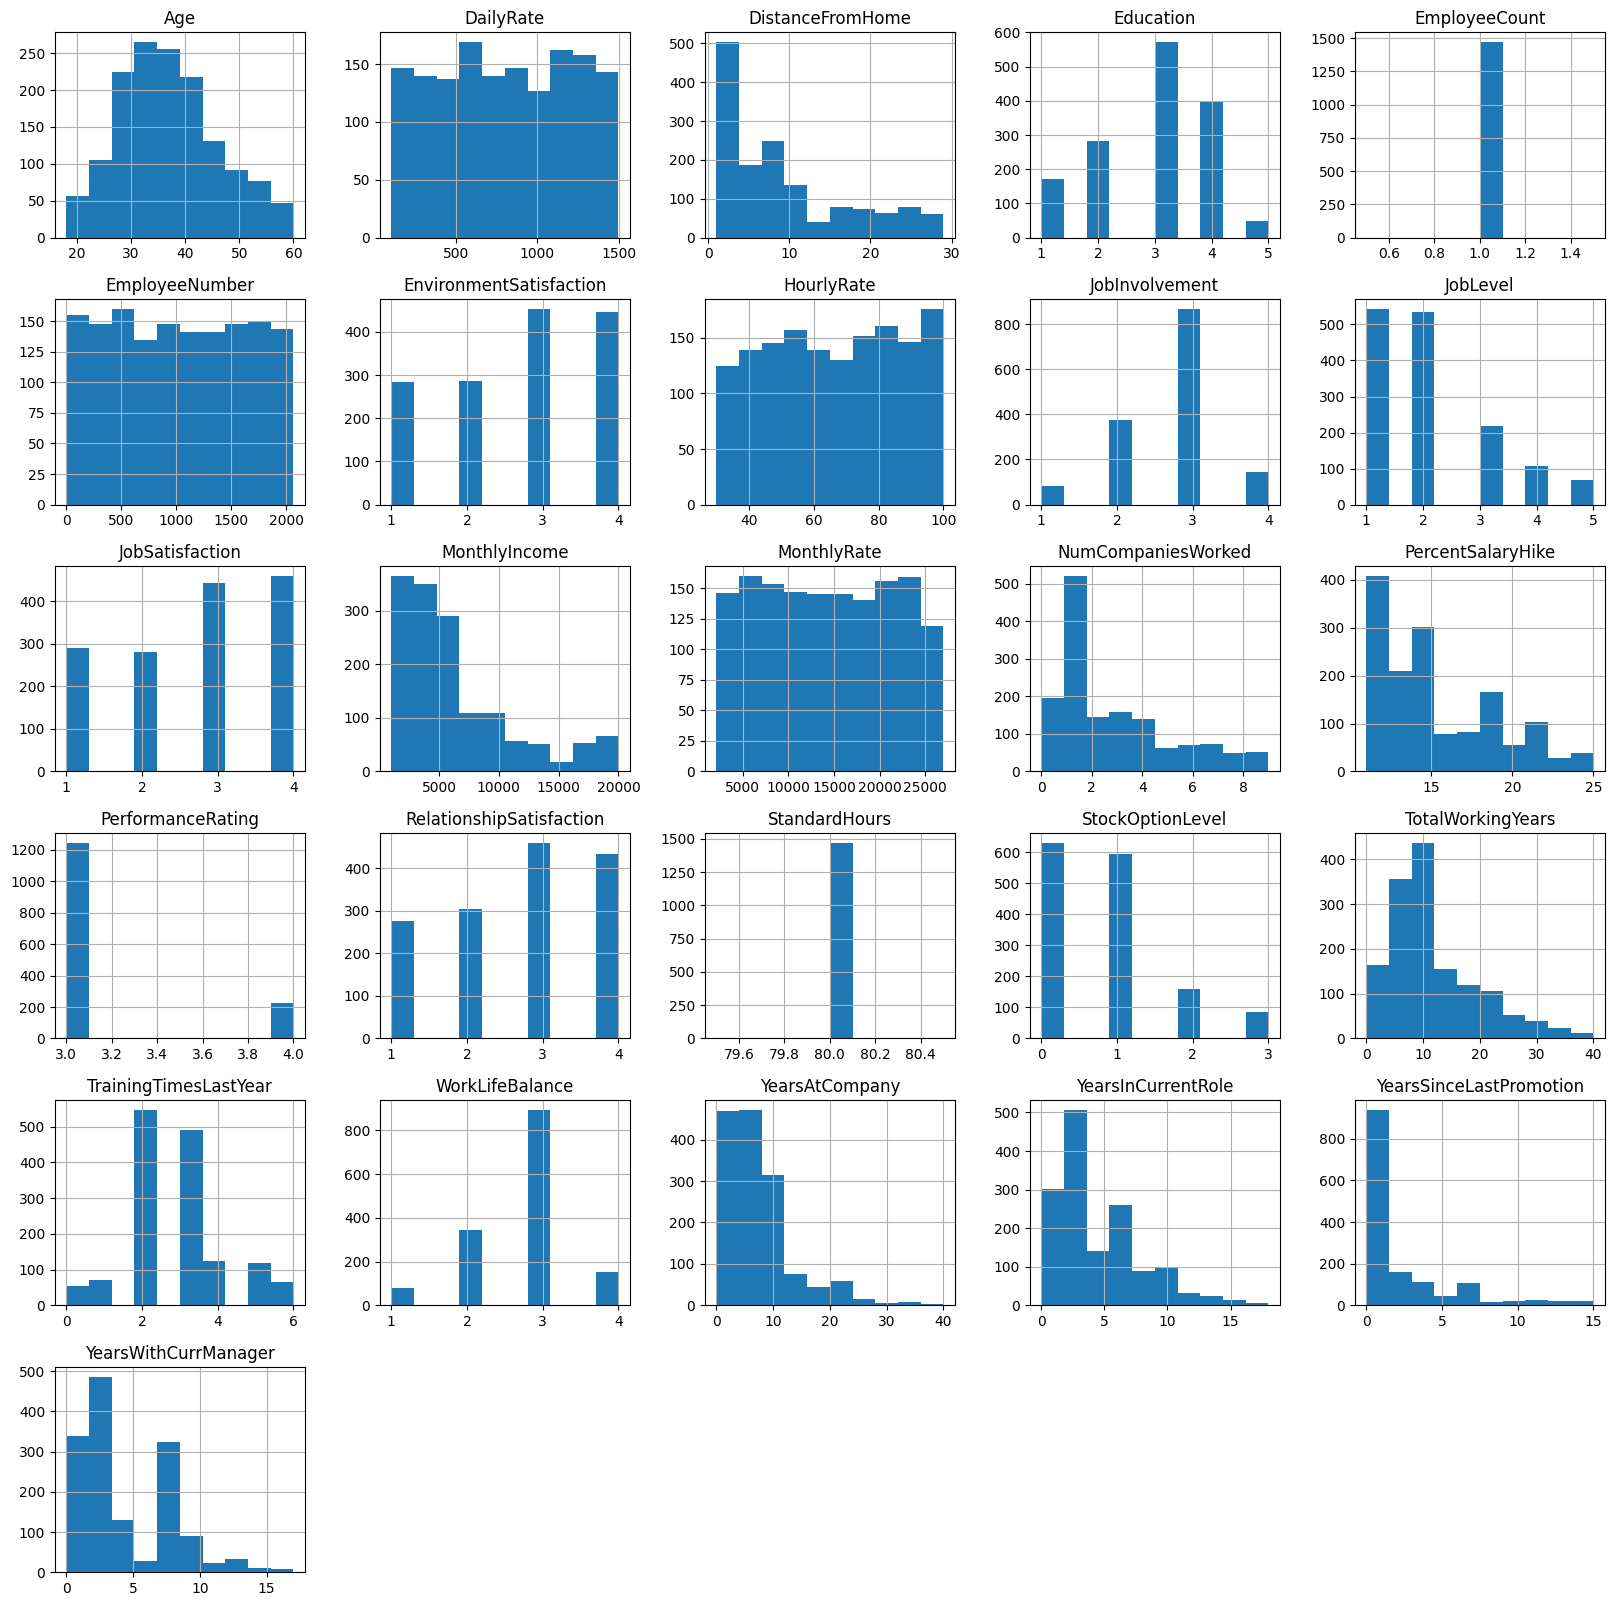

In [20]:
df.hist(figsize=(20,20))

<BarContainer object of 2 artists>

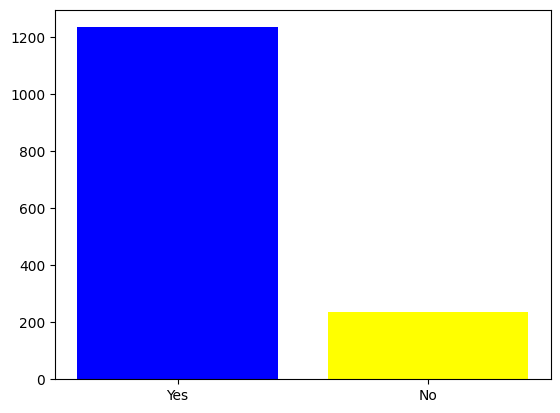

In [30]:
plt.bar(df['Attrition'].unique(), df['Attrition'].value_counts(), color=['blue', '#ffff00'])

<Axes: xlabel='Age', ylabel='count'>

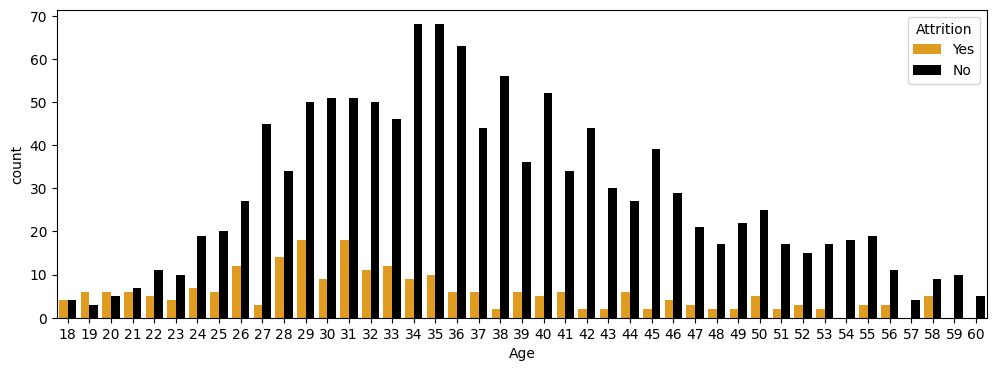

In [32]:
# Attrition by Age
plt.figure(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['orange','black'])

<Axes: xlabel='BusinessTravel', ylabel='count'>

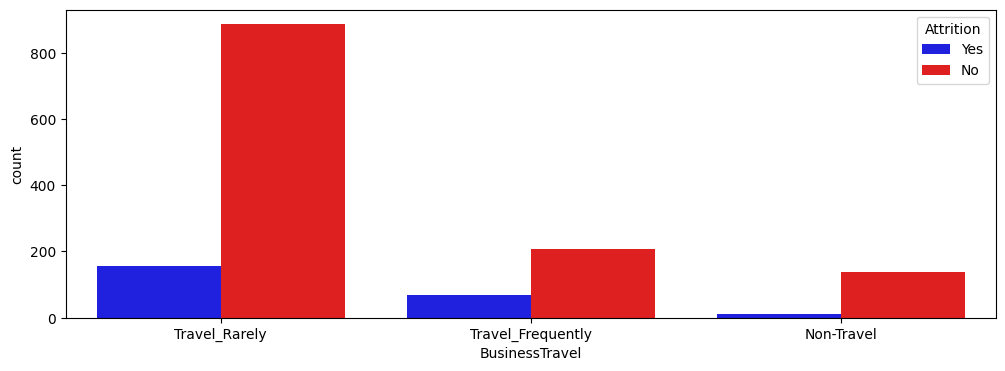

In [33]:
# Attrition by Business Travel
plt.figure(figsize=(12,4))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['blue','red'])

<Axes: xlabel='Department', ylabel='count'>

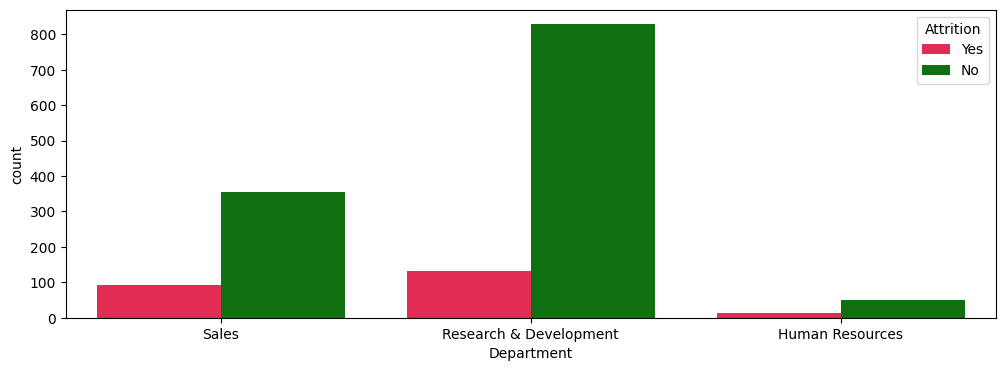

In [34]:
# Attrition by Department
plt.figure(figsize=(12,4))
sns.countplot(x='Department', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['#ff0f41','green'])

<Axes: xlabel='DistanceFromHome', ylabel='count'>

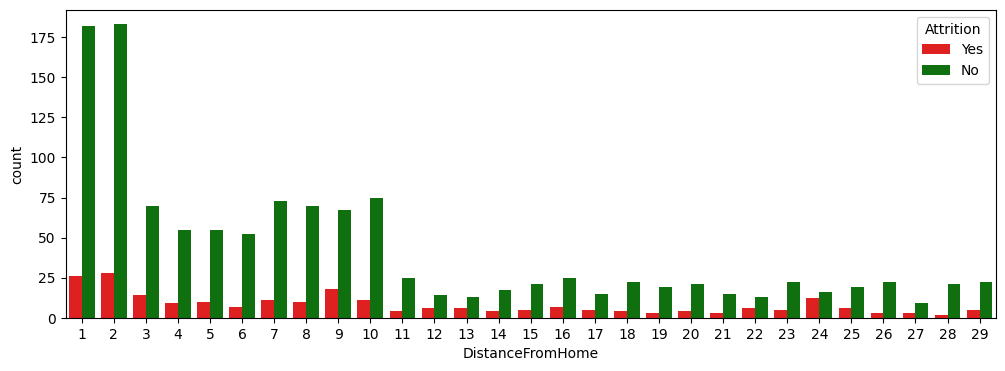

In [26]:
# Attrition by DistanceFromHome
plt.figure(figsize=(12,4))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green'])

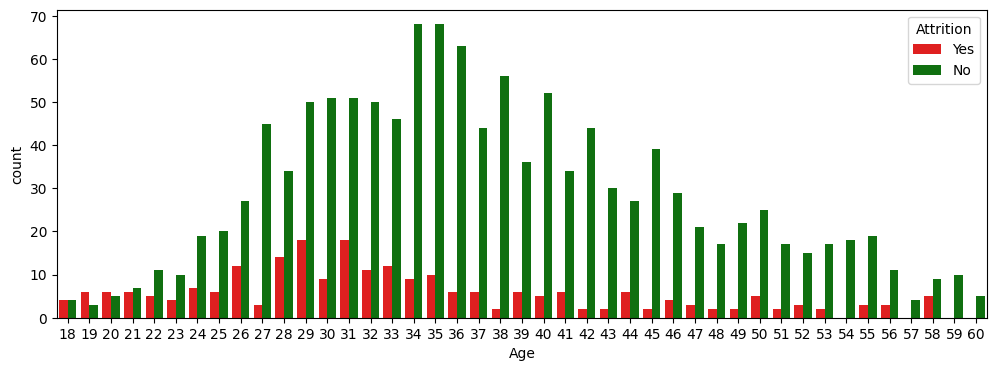

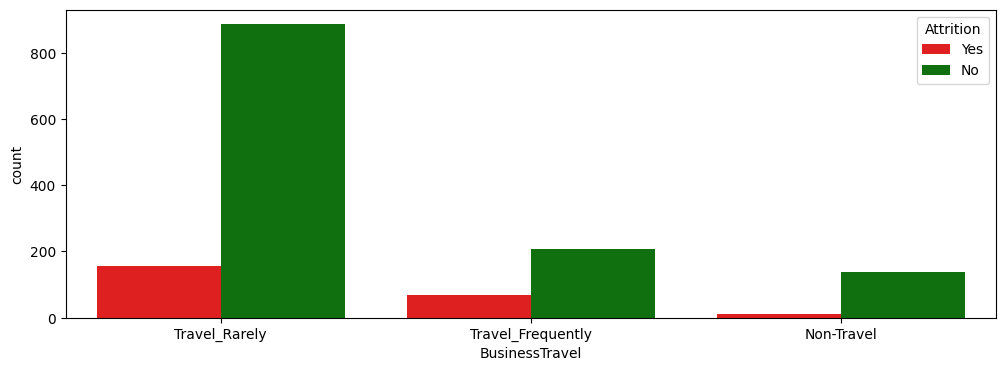

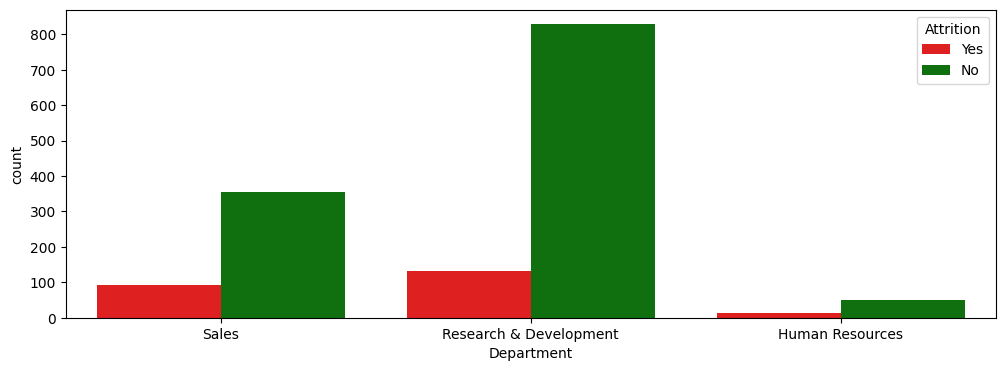

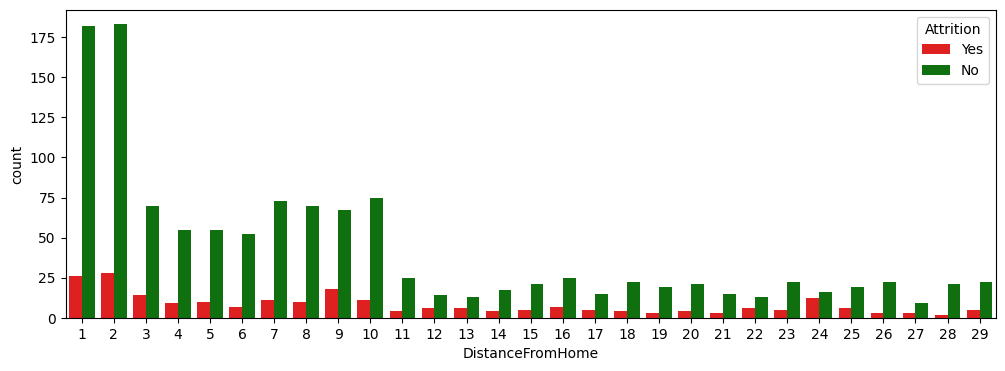

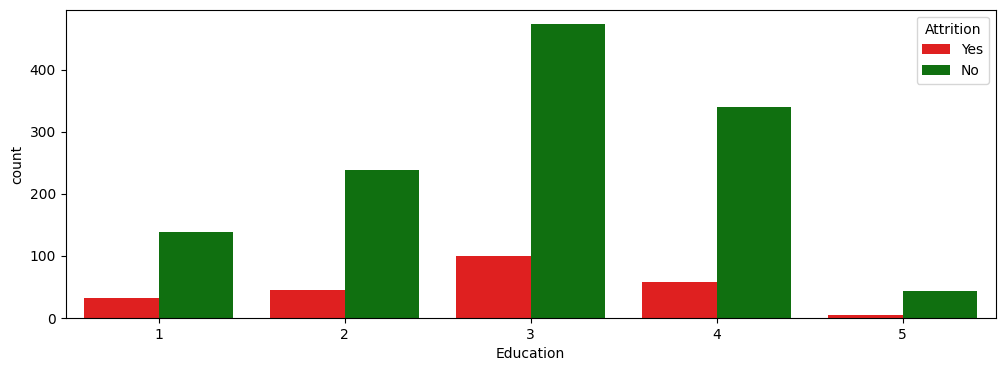

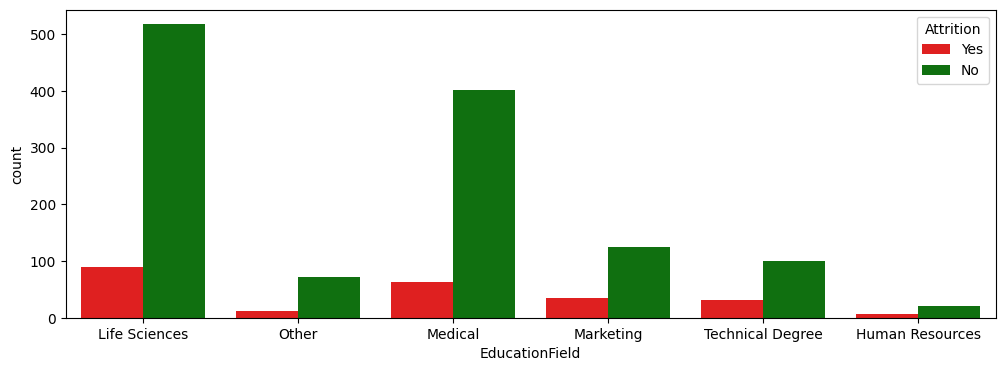

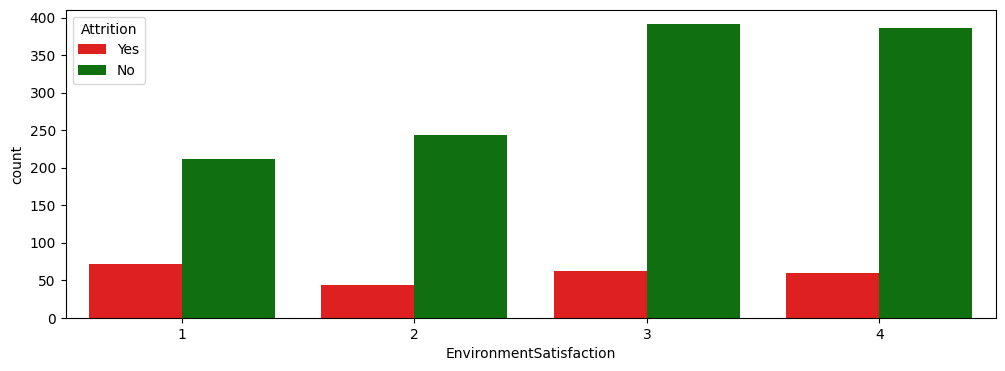

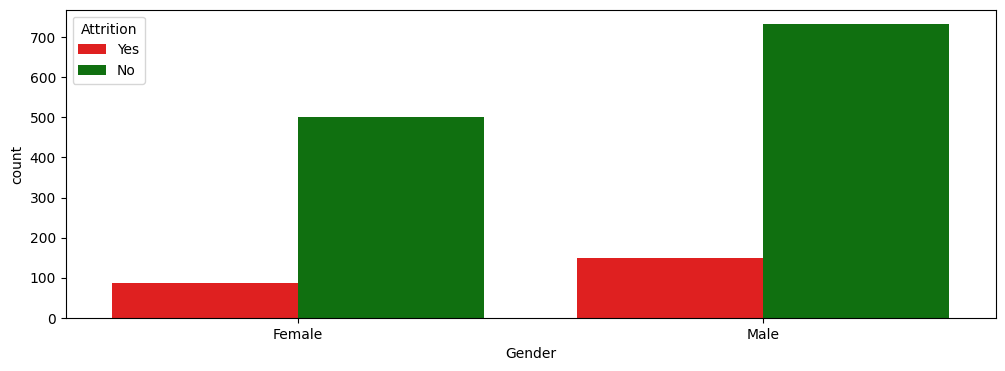

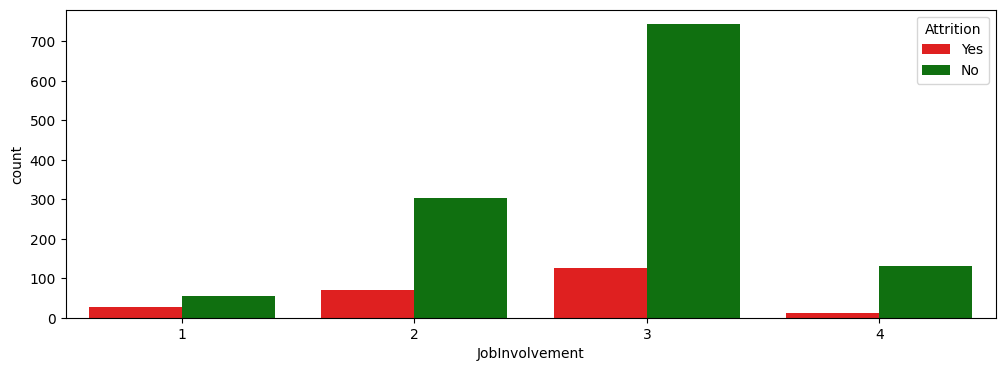

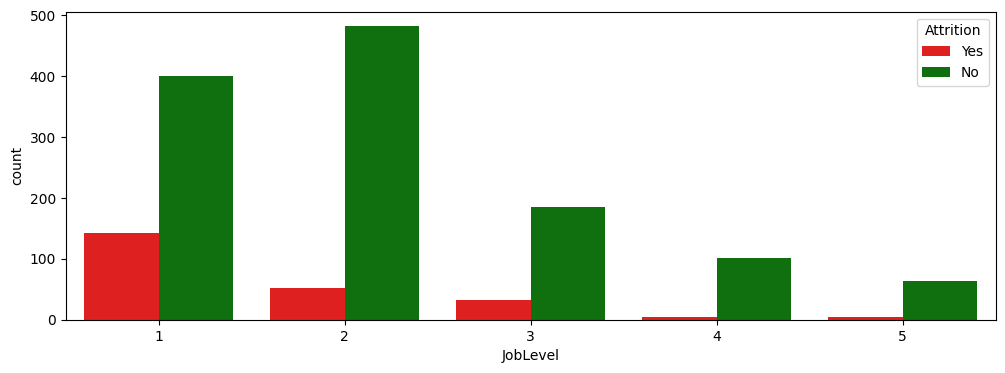

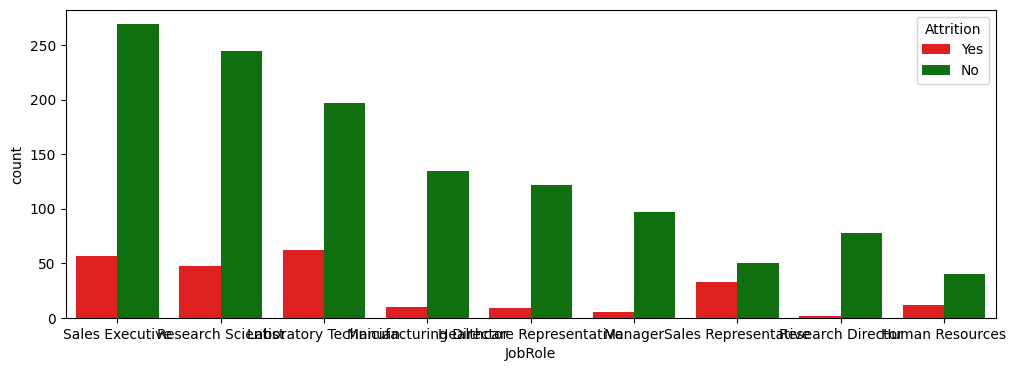

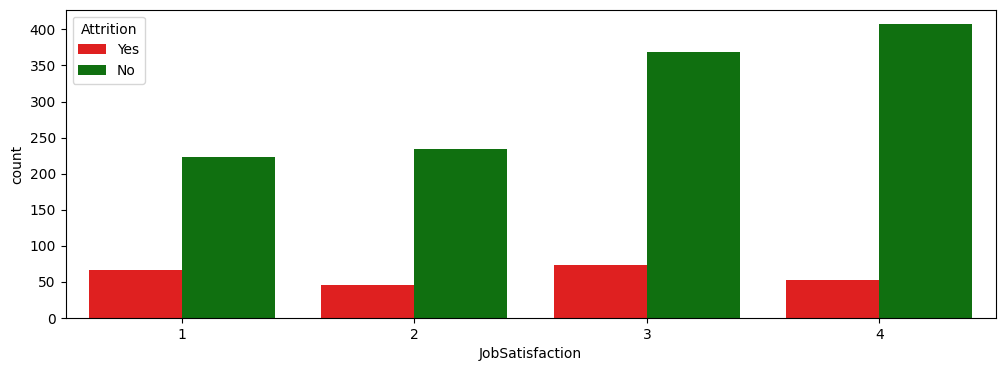

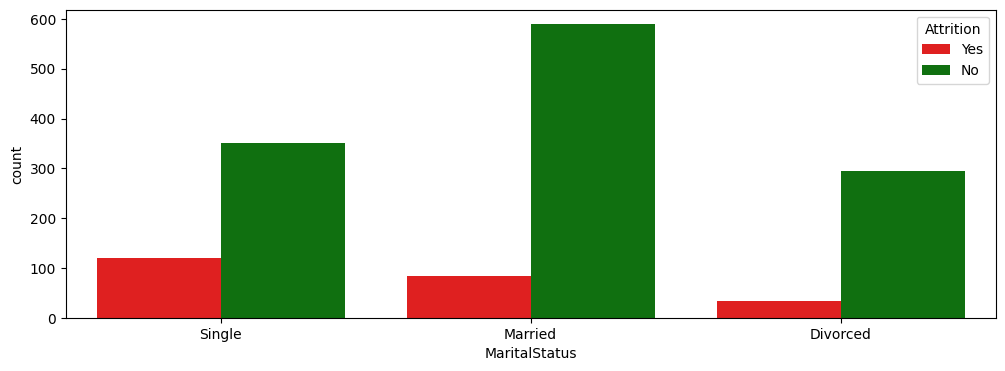

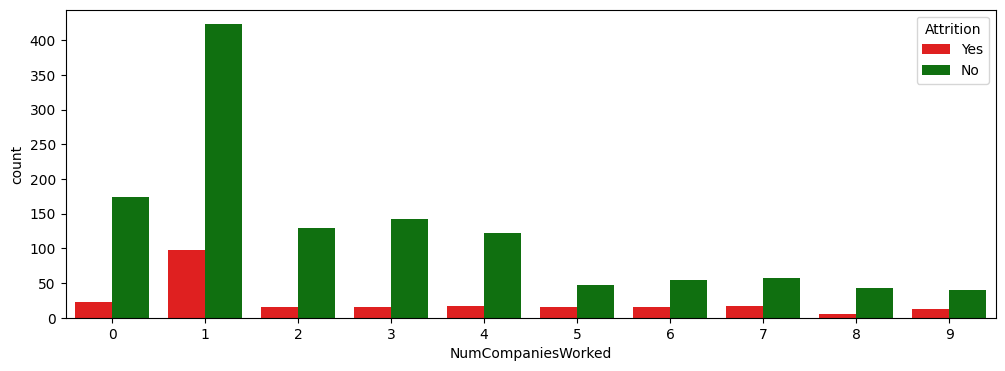

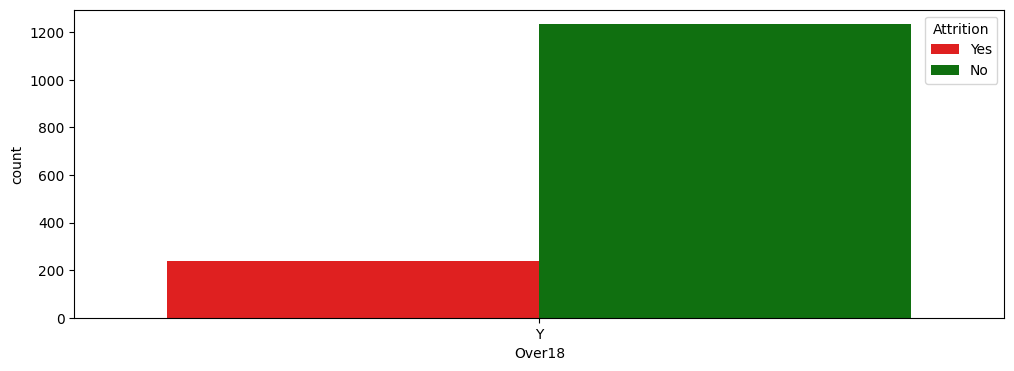

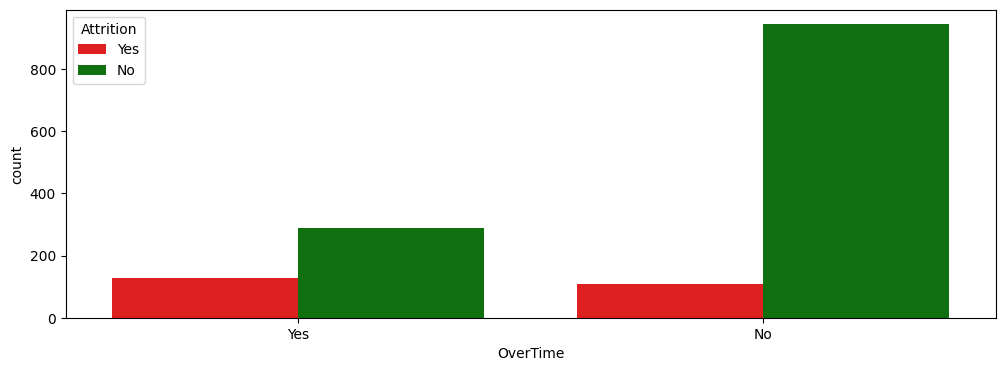

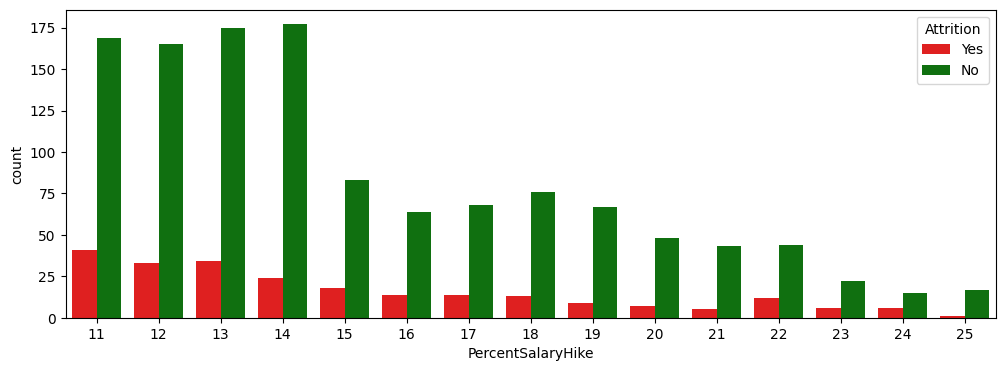

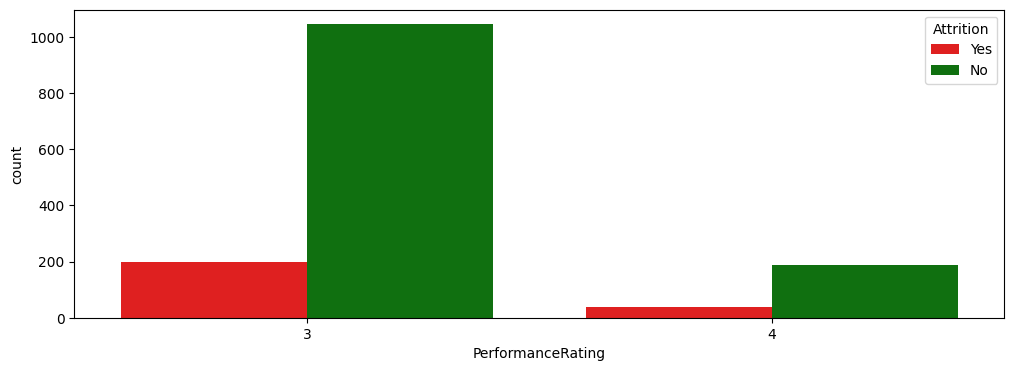

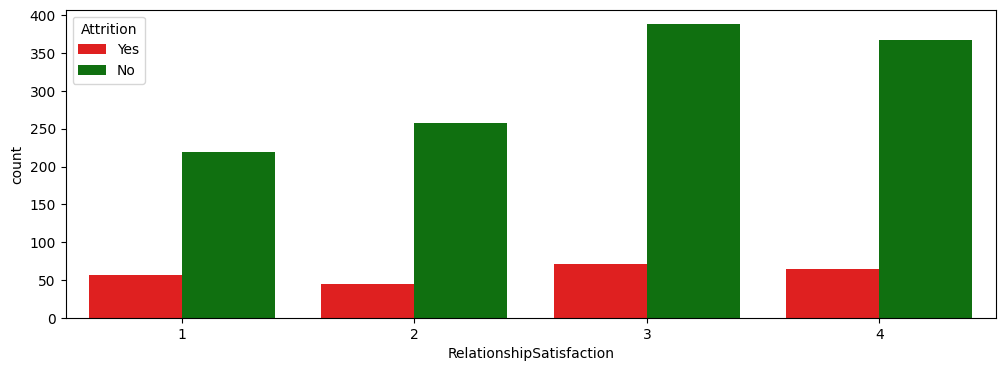

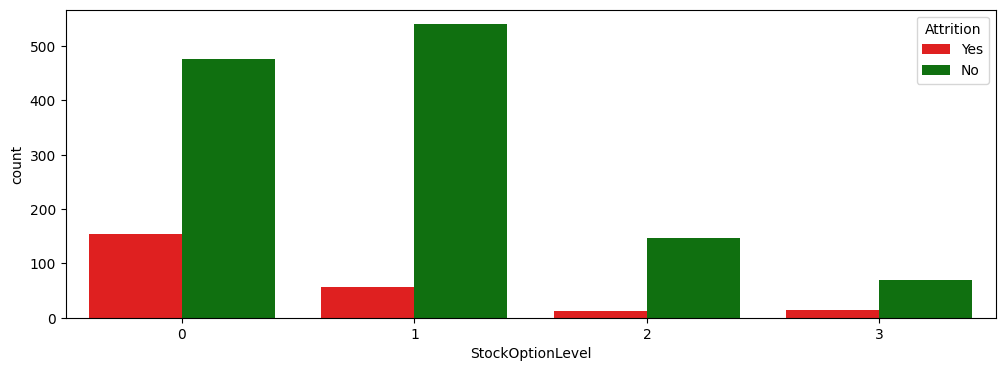

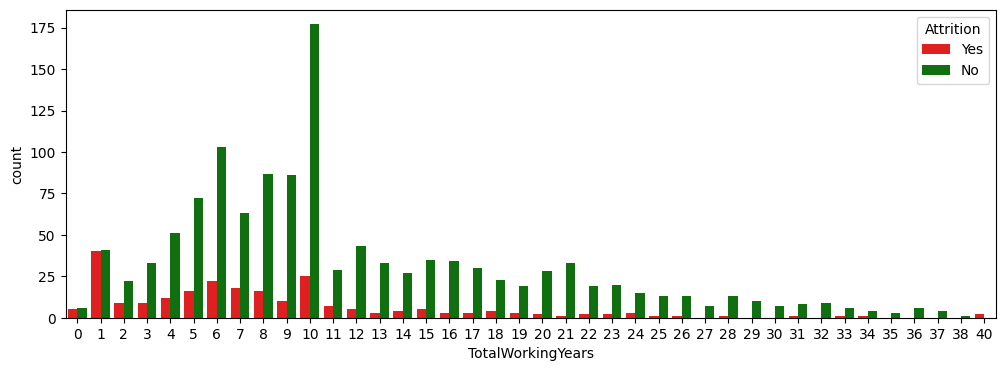

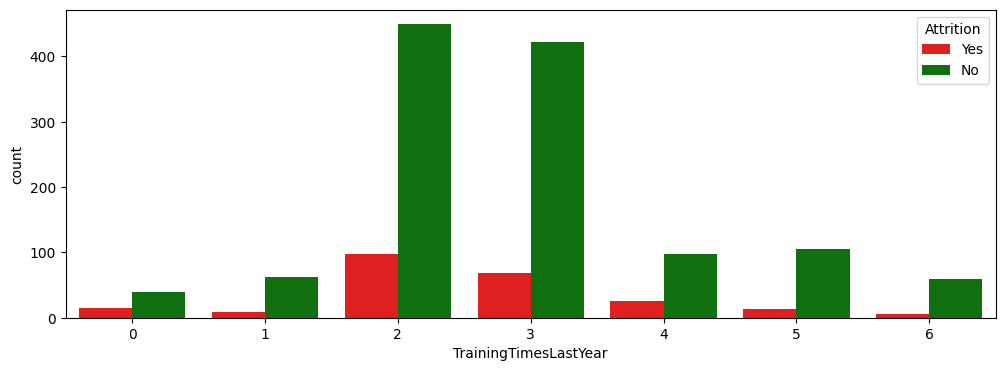

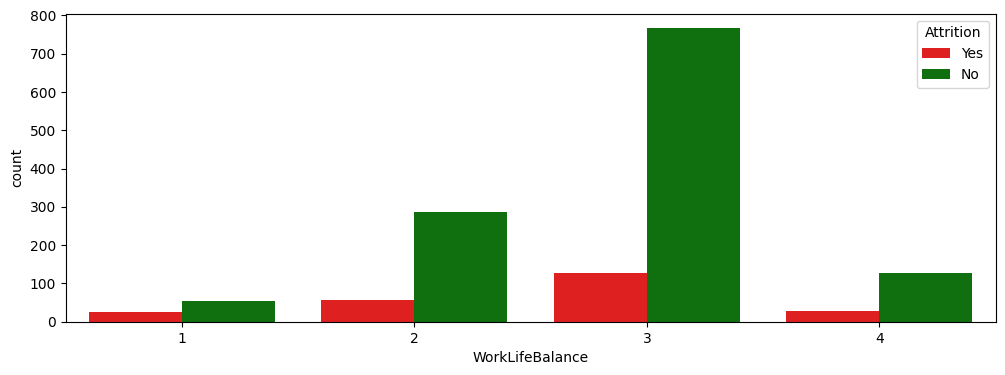

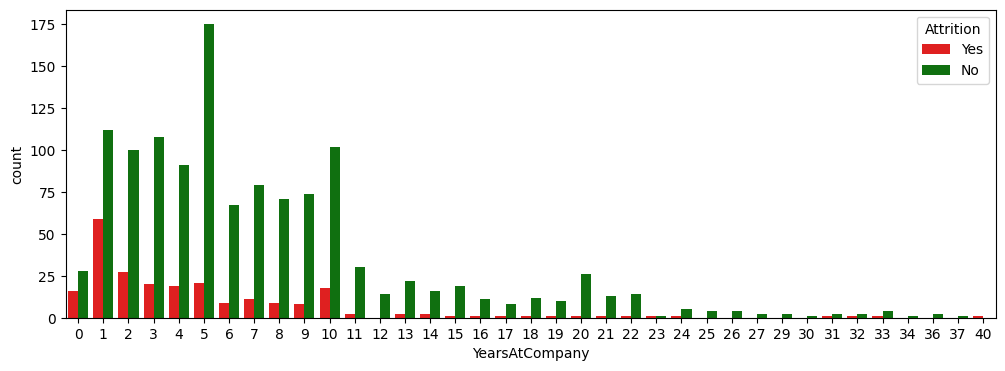

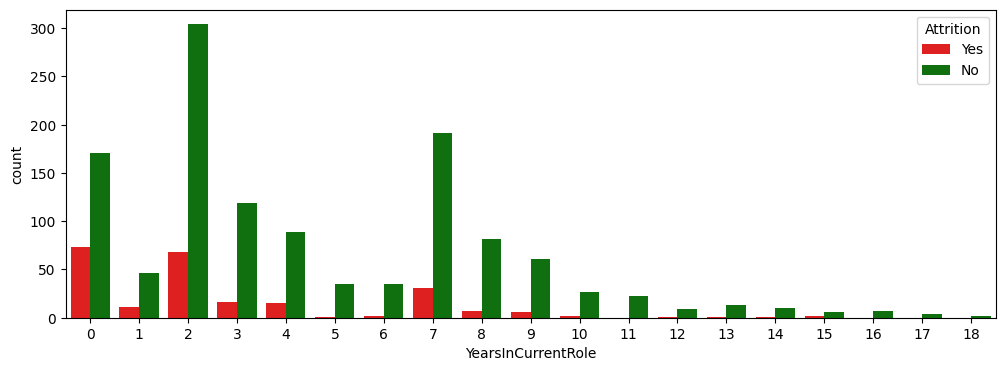

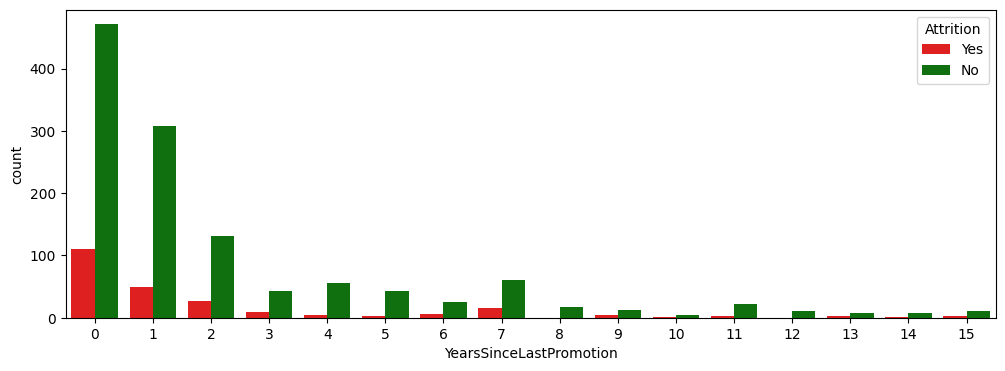

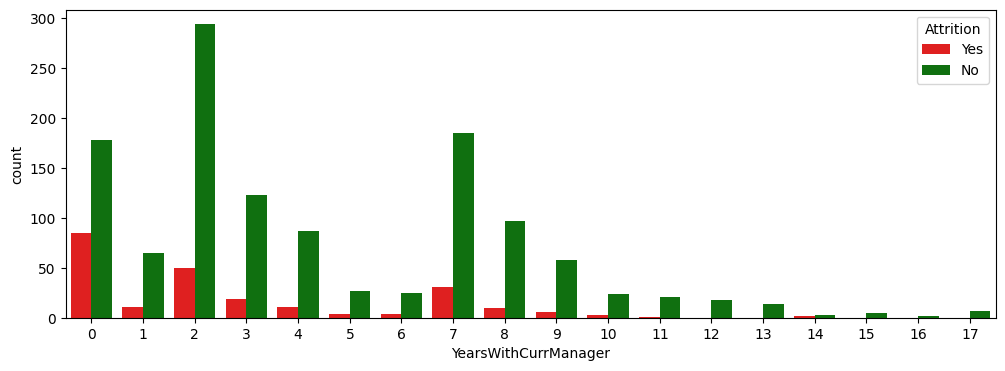

In [27]:
# Attrition for all the columns
for i, col in enumerate(df.drop(['Attrition','EmployeeCount','EmployeeNumber','DailyRate','StandardHours','HourlyRate','MonthlyIncome','MonthlyRate'], axis=1).columns):
    plt.figure(i,figsize=(12,4))
    sns.countplot(x=col, hue='Attrition', data=df,hue_order=['Yes','No'],palette=['red','green'])

In [35]:
def wrangle (filepath):
    df = pd.read_csv(filepath)
    df.drop(['EmployeeCount','EmployeeNumber','DailyRate','StandardHours','Over18'], axis=1, inplace=True)
    df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
    df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
    df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely':1, 'Travel_Frequently':2, 'Non-Travel':0})
    
    return df

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [37]:
df=wrangle('./employee.csv')
df.head()

Age  Attrition  BusinessTravel              Department  DistanceFromHome  \
0   41          1               1                   Sales                 1   
1   49          0               2  Research & Development                 8   
2   37          1               1  Research & Development                 2   
3   33          0               2  Research & Development                 3   
4   27          0               1  Research & Development                 2   

   Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2  Life Sciences                        2  Female          94   
1          1  Life Sciences                        3    Male          61   
2          2          Other                        4    Male          92   
3          4  Life Sciences                        4  Female          56   
4          1        Medical                        1    Male          40   

   JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0               3         2        Sales Executive                4   
1               2         2     Research Scientist                2   
2               2         1  Laboratory Technician                3   
3               3         1     Research Scientist                3   
4               3         1  Laboratory Technician                2   

  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0        Single           5993        19479                   8         1   
1       Married           5130        24907                   1         0   
2        Single           2090         2396                   6         1   
3       Married           2909        23159                   1         1   
4       Married           3468        16632                   9         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

Text(0.5, 1.0, 'Attrition percentage')

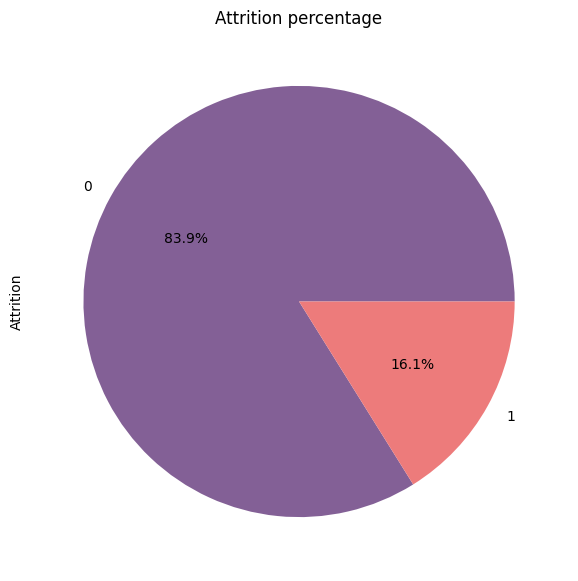

In [69]:
plt.figure(figsize=(7,7))
(df['Attrition'].value_counts()).plot.pie(autopct = "%1.1f%%", colors=['#836096', '#ED7B7B'])
plt.title('Attrition percentage')

In [70]:
#1. How Is Attrition Affected by Gender?
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender percentage')

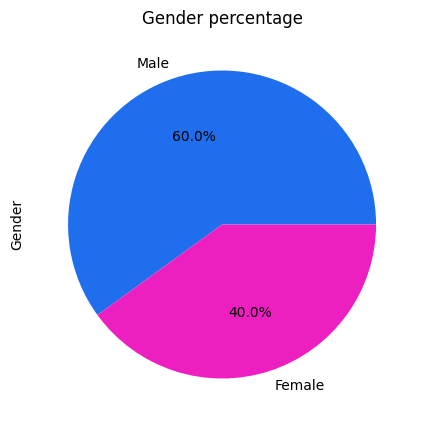

In [71]:
plt.figure(figsize=(5,5,))
(df['Gender'].value_counts()).plot.pie(autopct = "%1.1f%%", colors=['#1f6eed', '#ed1fc0'])
plt.title('Gender percentage')

In [74]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [75]:
##precentage of men who leaves:
150/237

0.6329113924050633

In [76]:
#How Is Attrition Affected by business travels?
(df['BusinessTravel'].value_counts()/df.shape[0])*100

1    70.952381
2    18.843537
0    10.204082
Name: BusinessTravel, dtype: float64

<Axes: xlabel='Attrition'>

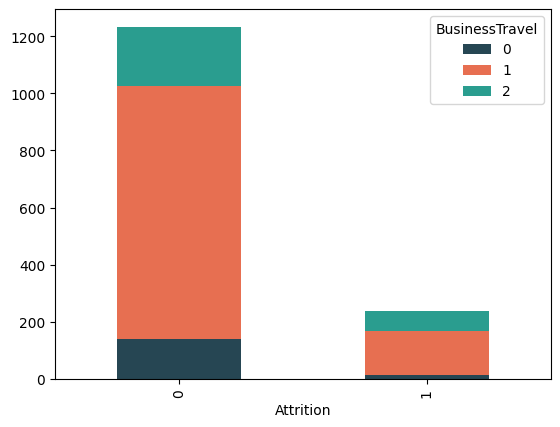

In [77]:
df.groupby(['Attrition','BusinessTravel']).size().unstack().plot(kind='bar', stacked=True,
                                                                 color=["#264653" , '#E76F51'  , '#2A9D8F'])

In [78]:
df.groupby(['Attrition']).sum()

Age  BusinessTravel  DistanceFromHome  Education  \
Attrition                                                       
0          46313            1303             10993       3609   
1           7965             294              2520        673   

           EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
Attrition                                                                  
0                             3417       81319            3416      2646   
1                              584       15541             597       388   

           JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
Attrition                                                                    
0                     3426        8424768     17589706                3262   
1                      585        1134541      3450556                 697   

           OverTime  PercentSalaryHike  PerformanceRating  \
Attrition                                                   
0               289              18780               3888   
1               127               3578                748   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                                                                  
0                              3371              1042              14627   
1                               616               125               1954   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
0                           3493             3429            9086   
1                            622              630            1216   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
0                        5529                     2755                  5385  
1                         688                      461                   676

In [79]:
#what is effect of the distance from home on attrition ?
df.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

<Axes: xlabel='DistanceFromHome', ylabel='Attrition'>

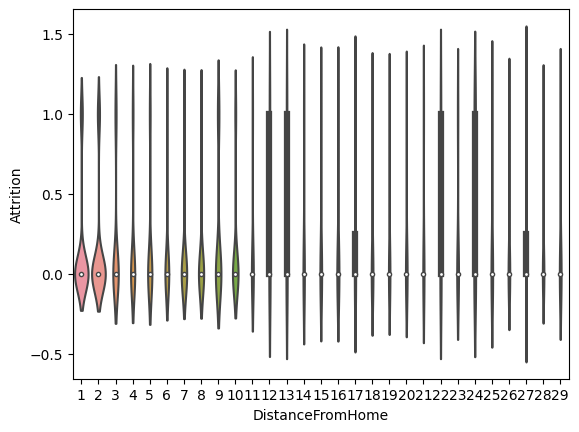

In [81]:
sns.violinplot(df, x = 'DistanceFromHome',y = 'Attrition', scale="count")

In [82]:
#What is the most Department of attritions 
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [83]:
df.Department.value_counts()/df.shape[0]*100

Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: Department, dtype: float64

In [87]:
Attrition=df[df['Attrition']=="Yes"]
Attrition

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

In [86]:
Attrition.Department.value_counts()

Series([], Name: Department, dtype: int64)

Text(0, 0.5, 'count')

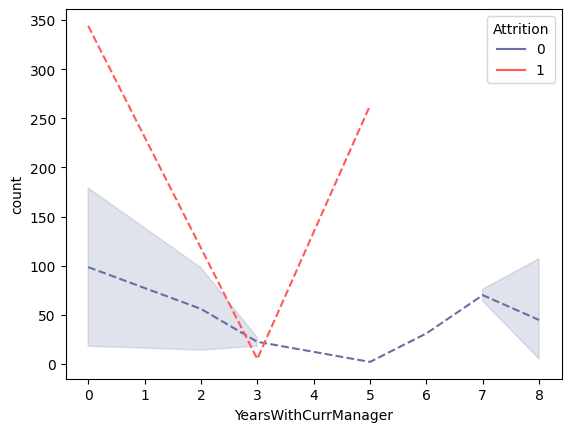

In [90]:
df['YearsWithCurrManager'].corr(data['Attrition'])
A=df.loc[:,[ "YearsWithCurrManager",'Attrition']].sort_values(by='YearsWithCurrManager')
sns.lineplot(x =df["YearsWithCurrManager"], y = df["YearsWithCurrManager"].value_counts(),
            linestyle = "dashed", hue=df['Attrition'], palette=['#676FA3','#FF5959']) 
plt.ylabel('count')

In [92]:
df['distance']=df["DistanceFromHome"]
df['distance']= np.where(df['distance'] <= 13, 'Near', 'Far')
df

Age  Attrition  BusinessTravel              Department  \
0      41          1               1                   Sales   
1      49          0               2  Research & Development   
2      37          1               1  Research & Development   
3      33          0               2  Research & Development   
4      27          0               1  Research & Development   
...   ...        ...             ...                     ...   
1465   36          0               2  Research & Development   
1466   39          0               1  Research & Development   
1467   27          0               1  Research & Development   
1468   49          0               2                   Sales   
1469   34          0               1  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
0                      8         1                 11                  3   
1                      1         0                 23                  4   
2                      6         1                 15                  3   
3                      1         1                 11                  3   
4                      9         0                 12                  3   
...                  ...       ...                ...                ...   
14

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

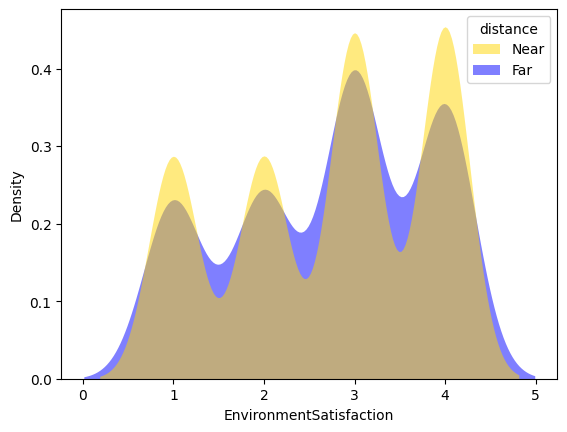

In [93]:
near= df[df['distance'] =='Near']
far=df[df['distance'] =='Far']
sns.kdeplot(
   data=df, x="EnvironmentSatisfaction", hue="distance",
   fill=True, common_norm=False, palette=['gold','blue'],
   alpha=.5, linewidth=0,
)

<Axes: xlabel='JobSatisfaction', ylabel='Density'>

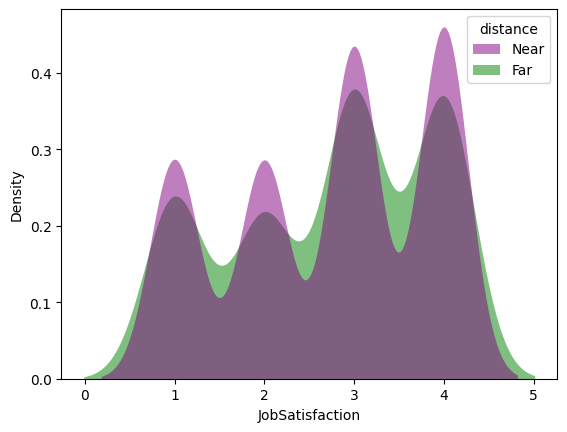

In [94]:
sns.kdeplot(
   data=df, x="JobSatisfaction", hue="distance",
   fill=True, common_norm=False, palette=['purple','green'],
   alpha=.5, linewidth=0,
)

<Axes: xlabel='RelationshipSatisfaction', ylabel='Density'>

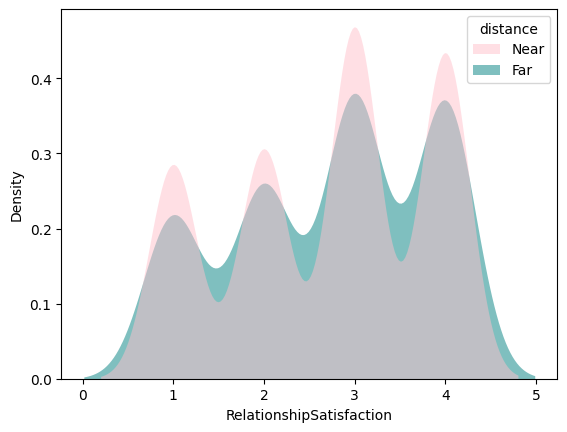

In [95]:
sns.kdeplot(
   data=df, x="RelationshipSatisfaction", hue="distance",
   fill=True, common_norm=False, palette=['pink','teal'],
   alpha=.5, linewidth=0,
)

<Axes: >

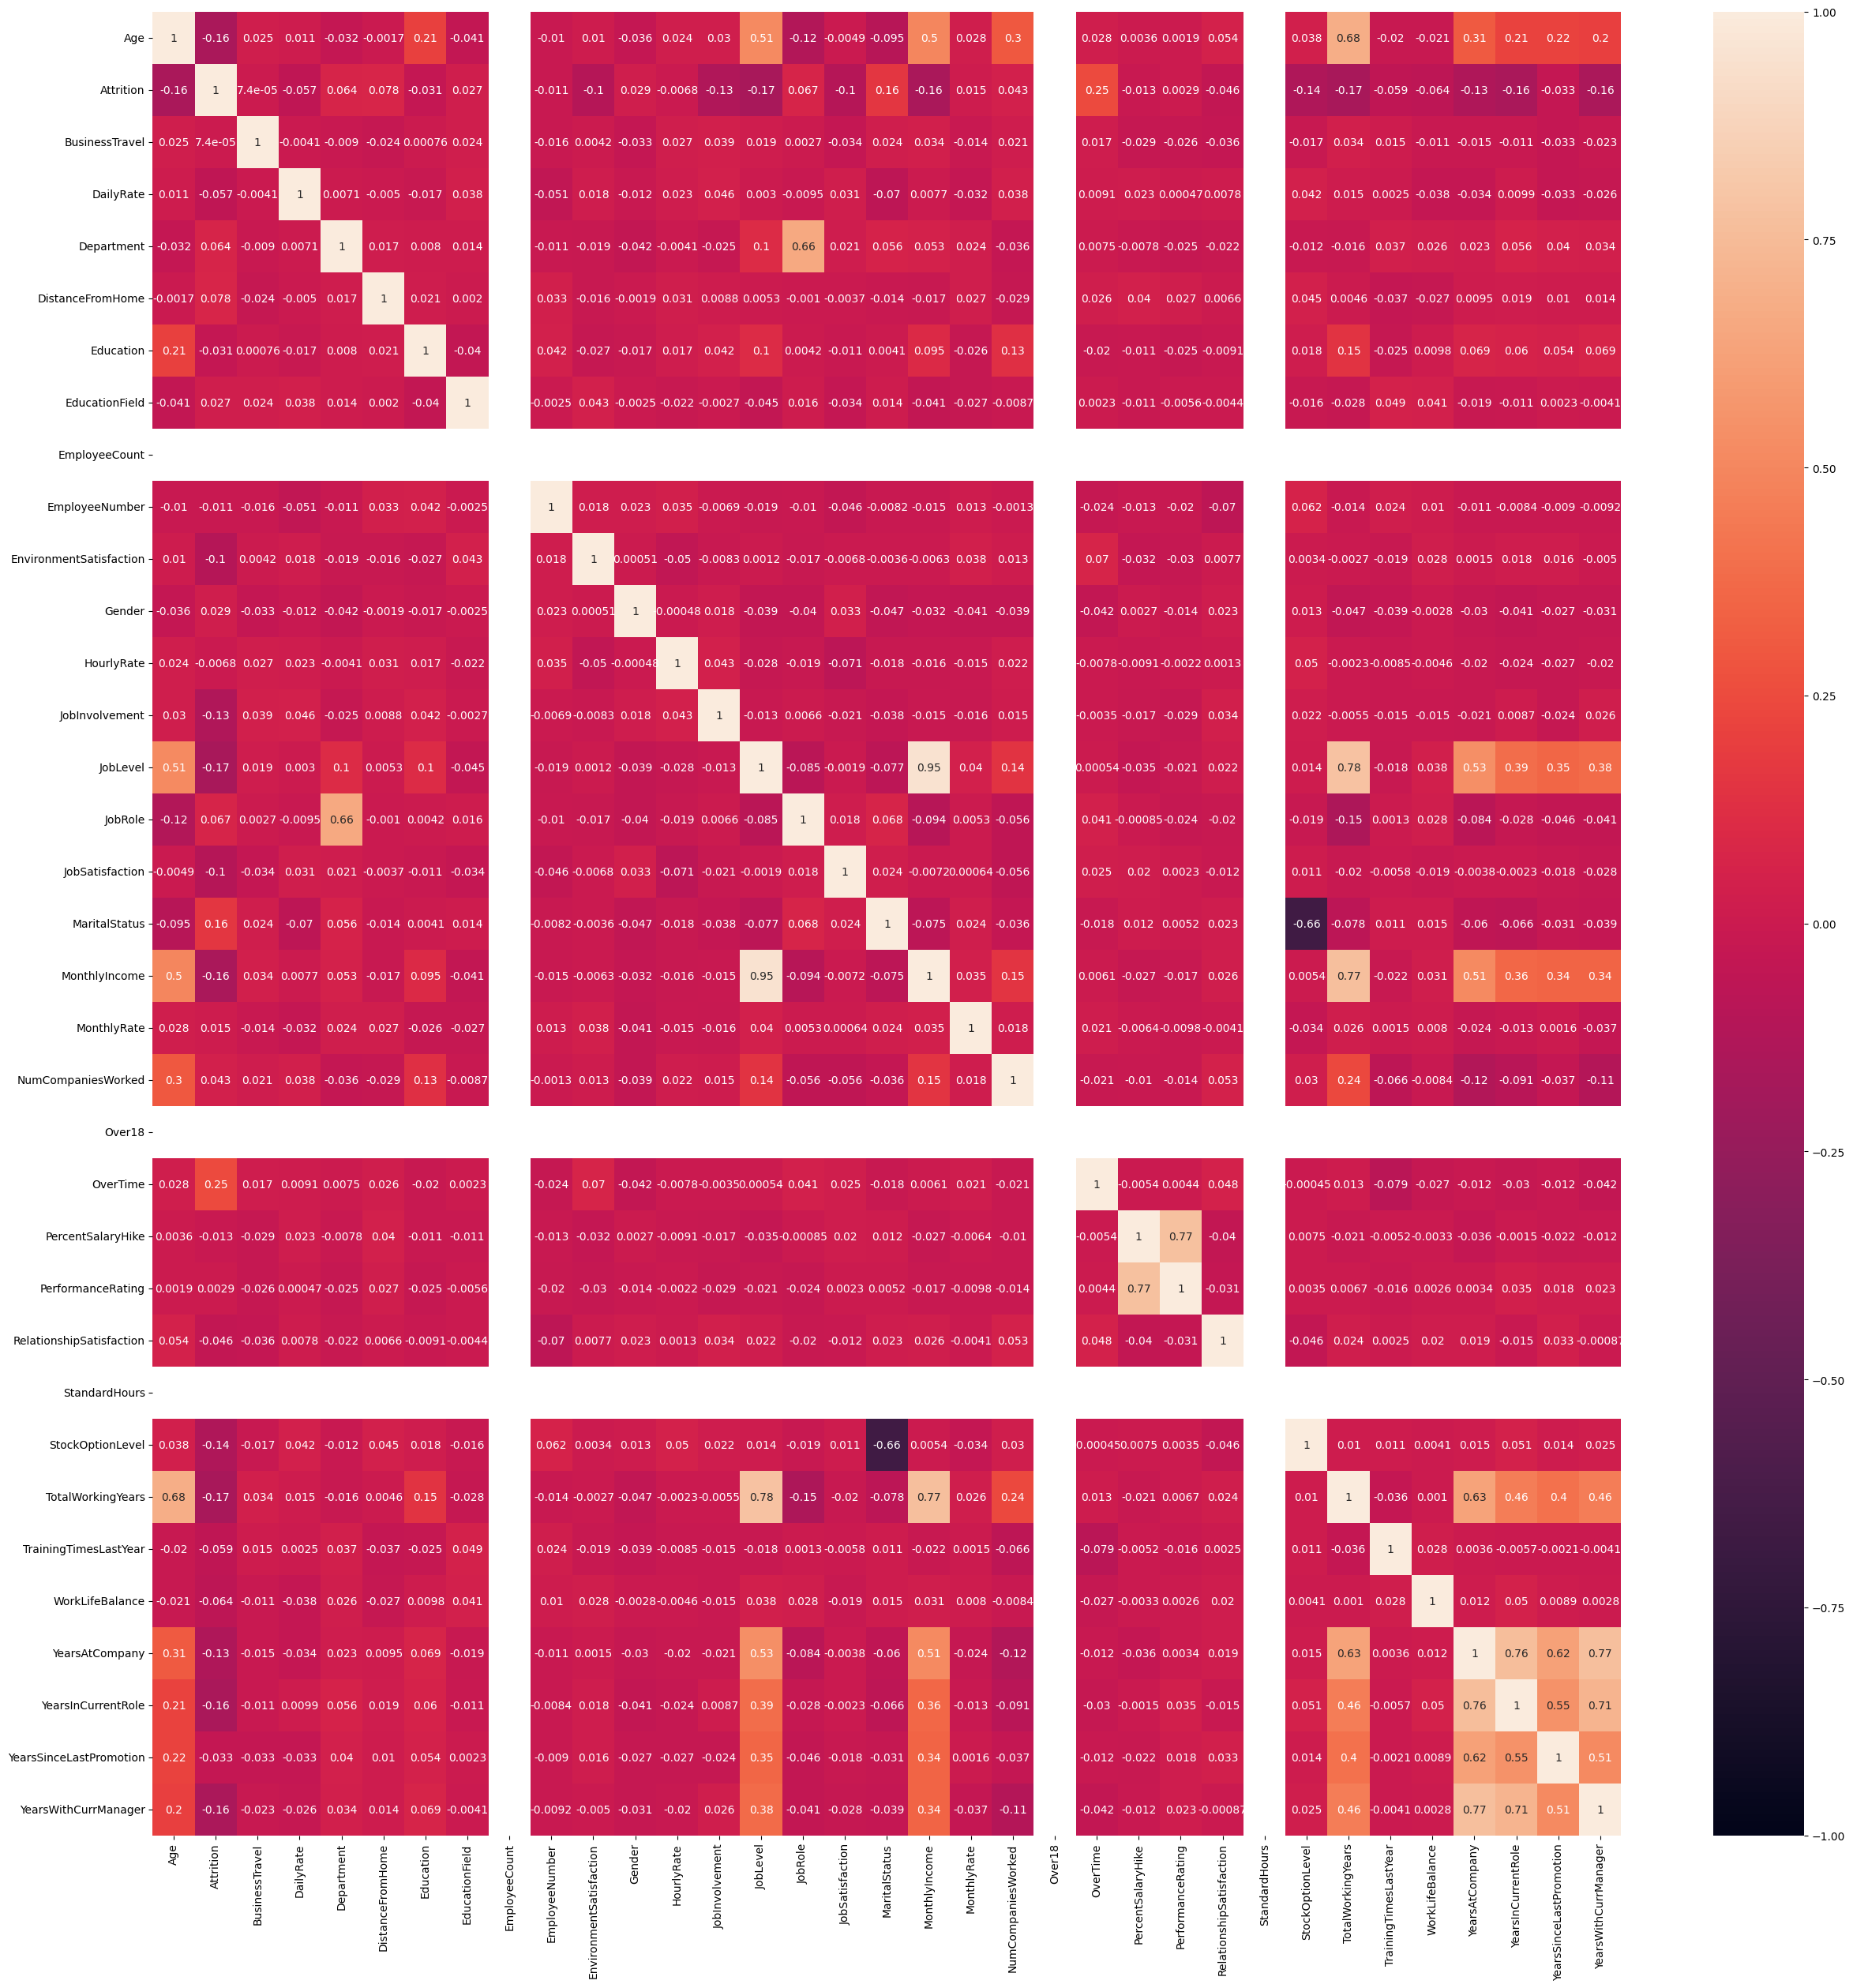

In [96]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=+1)

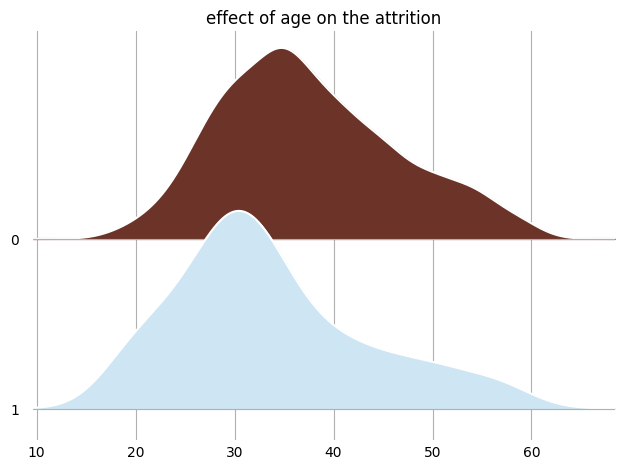

In [98]:
import joypy
fig, ax = joypy.joyplot(df, by = "Attrition", column = "Age", title = "effect of age on the attrition",
                       grid=True, color=['#6C3428','#CEE6F3'],linecolor='white')

<Axes: xlabel='Attrition', ylabel='Age'>

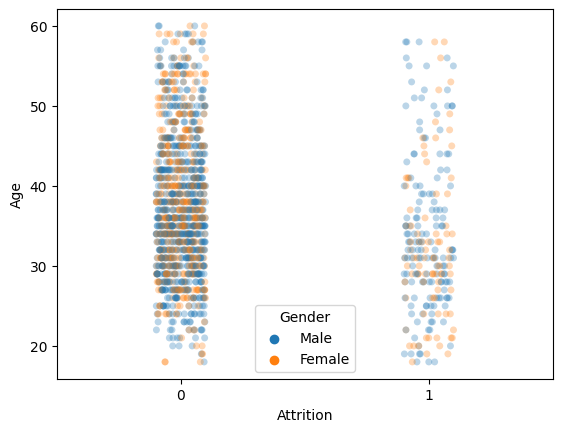

In [99]:
sns.stripplot(data=df, y="Age", hue="Gender",
              x="Attrition",alpha=0.3, orient="v")

Text(0.5, 0, 'MonthlyIncome hue')

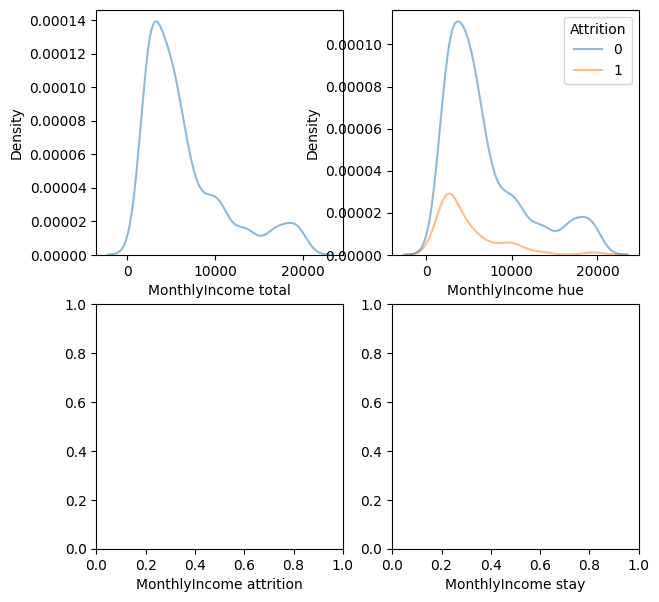

In [101]:
g=df[df['Attrition']=='Yes']
g2=df[df['Attrition']=='No']
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.kdeplot(x = g['MonthlyIncome'],
            fill = True, color = "teal", alpha = 0.5, ax=axs[1, 0]). set_xlabel('MonthlyIncome attrition')
sns.kdeplot(x = g2['MonthlyIncome'],
            fill = True, color = "gold", alpha = 0.5, ax=axs[1, 1]). set_xlabel('MonthlyIncome stay')
sns.kdeplot(x = df['MonthlyIncome'],
            fill = False, alpha = 0.5, ax=axs[0, 0]). set_xlabel('MonthlyIncome total')
sns.kdeplot(x = df['MonthlyIncome'],hue=df['Attrition'],
            fill = False, alpha = 0.5, ax=axs[0, 1]). set_xlabel('MonthlyIncome hue')

Text(0.5, 1.0, 'EducationField and Attrition')

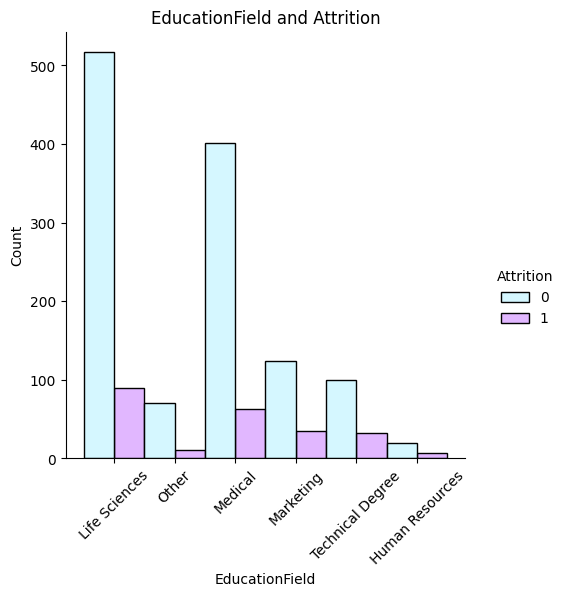

In [105]:
sns.displot(data=df, x="EducationField", hue="Attrition", palette=['#C7F5FF','#D89FFF'],multiple='dodge')
plt.xticks(rotation = 45)
plt.title("EducationField and Attrition")

<Axes: xlabel='Education', ylabel='MonthlyIncome'>

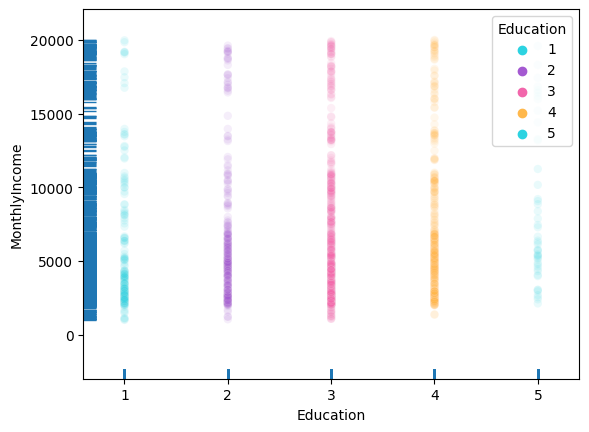

In [106]:
sns.scatterplot(data=df, x='Education', y="MonthlyIncome", alpha=0.1,
                hue='Education',
               palette=['#2CD3E1','#A459D1','#F266AB','#FFB84C'])
sns.rugplot(data=df, x='Education', y="MonthlyIncome")

In [107]:
df.loc[:,['JobLevel','PerformanceRating']].value_counts()

JobLevel  PerformanceRating
1         3                    455
2         3                    454
3         3                    185
1         4                     88
4         3                     88
2         4                     80
5         3                     62
3         4                     33
4         4                     18
5         4                      7
dtype: int64

<Axes: xlabel='JobLevel', ylabel='PerformanceRating'>

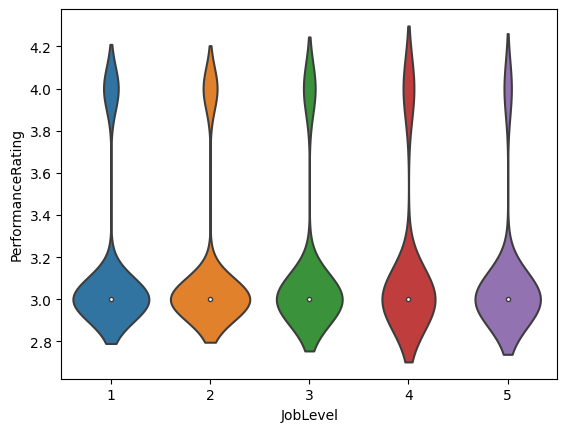

In [108]:
sns.violinplot(df, y = 'PerformanceRating',x = 'JobLevel')

<Axes: xlabel='PerformanceRating', ylabel='JobLevel'>

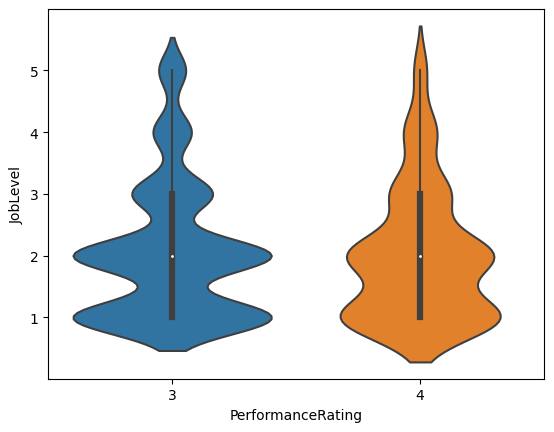

In [109]:
sns.violinplot(df, x = 'PerformanceRating',y = 'JobLevel')

In [114]:
new_hire= df[df.YearsAtCompany<=1]
new_hire

Age  Attrition  BusinessTravel              Department  \
2      37          1               1  Research & Development   
6      59          0               1  Research & Development   
7      30          0               1  Research & Development   
17     22          0               0  Research & Development   
23     21          0               1  Research & Development   
...   ...        ...             ...                     ...   
1394   32          0               1  Research & Development   
1402   31          0               1  Research & Development   
1415   33          0               0  Research & Development   
1427   40          0               1  Research & Development   
1438   23          1               2                   Sales   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
2                    2          2          Other                        4   
6                    3          3        Medical                        3   
7                   24          1  Life Sciences                        4   
17                  16          2        Medical                        4   
23                  15          2  Life Sciences                        3   
...                ...        ...            ...                      ...   
1394                 5          4  Life Sciences                        4   
1402                 2          1        Medical                        4   
1415                 1          2        Medical                        2   
1427                 1          4  Life Sciences                        1   
1438                 9          3      Marketing                        4   

      Gender  HourlyRate  JobInvolvement  JobLevel                 JobRole  \
2       Male          92               2         1   Laboratory Technician   
6     Female          81               4         1   Laboratory Technician   
7       Male          67               3         1   Laboratory Technician   
17      Male          96               4         1   Laboratory Technician   
23      Male          96               3         1      Research Scientist   
...      ...         ...             ...       ...                     ...   
1394    Male          56               2         2  Manufacturing Director   
1402  Female          59               1         1   Laboratory Technician   
1415    Male          59               2         1   Laboratory Technician   
1427    Male          83               3         1   Laboratory Technician   
1438    Male          33               3         1    Sales Representative   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
2                   3        Single           2090         2396   
6                   1       Married           2670         9964   
7                   3      Divorced           2693        13335   
17                  4      Divorced           2935         7324   
23                  4        Single           1232        19281   
...               ...           ...            ...          ...   
1394                4        Single           9679        10138   
1402                4      Divorced           1129        17536   
1415                3      Divorced           2008        20439   
1427                4       Married           2406         4060   
1438                1       Married           1790        26956   

      NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  \
2                      6         1                 15                  3   
6                      4         1                 20                  4   
7                      1         0                 22                  4   
17                     1         1                 13                  3   
23                     1         0                 14                  3   
...                  ...       ...                ...                ...   
1394                   8         0    

In [115]:
n= new_hire[new_hire.Attrition=='Yes']

In [116]:
n.shape[0]/new_hire.shape[0]*100

0.0

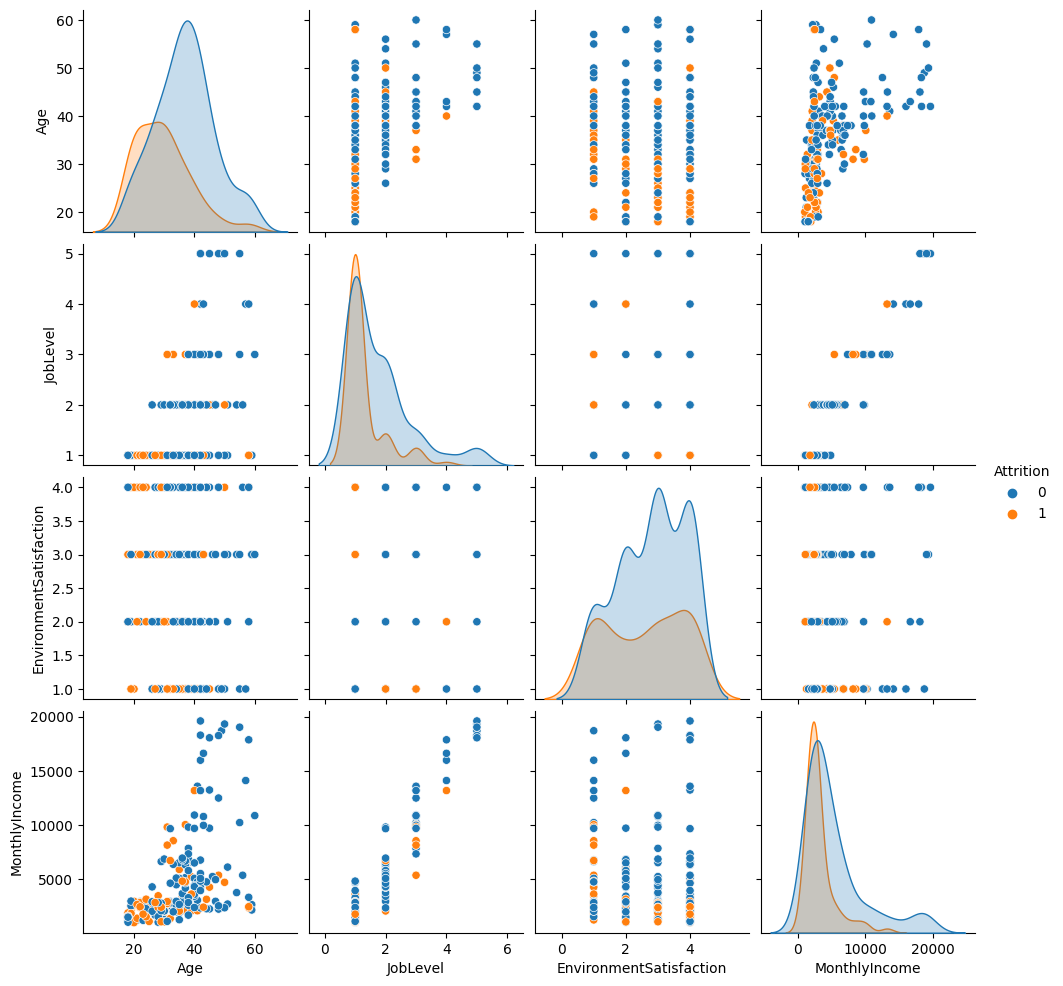

In [117]:
sns.pairplot(new_hire, 
             x_vars=['Age','JobLevel','EnvironmentSatisfaction','MonthlyIncome'],
            y_vars=['Age','JobLevel','EnvironmentSatisfaction','MonthlyIncome'],
             hue="Attrition", )

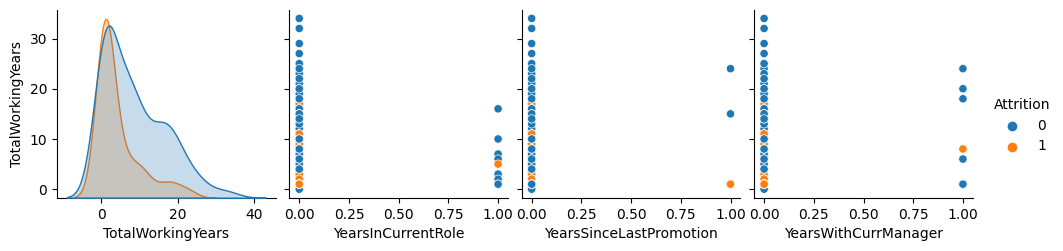

In [118]:
sns.pairplot(new_hire,
            x_vars=['TotalWorkingYears','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],
            y_vars=['TotalWorkingYears'],
             hue="Attrition")

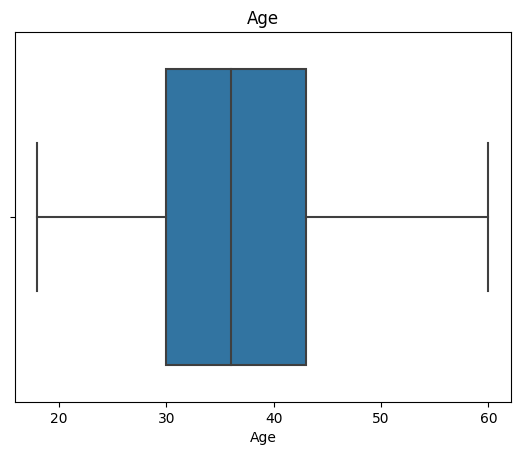

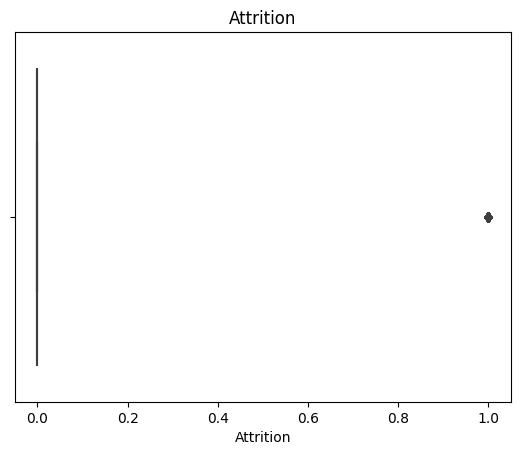

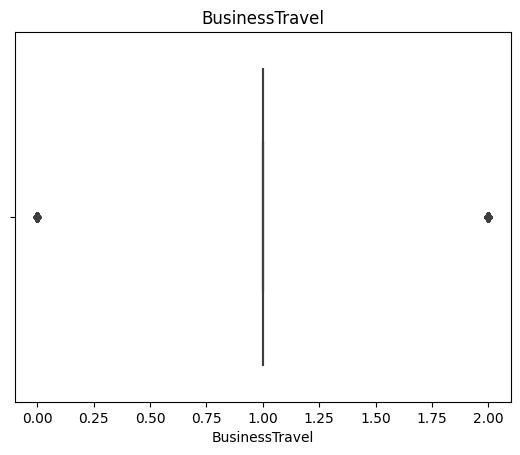

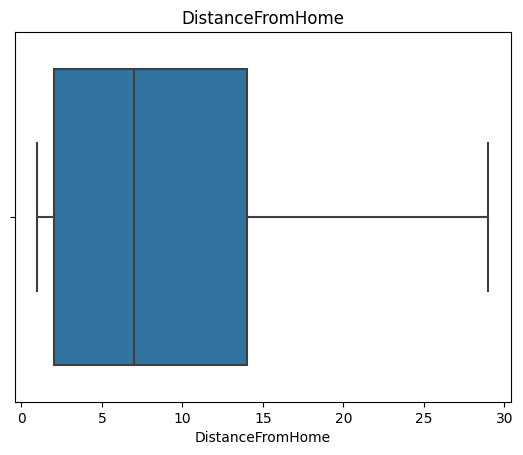

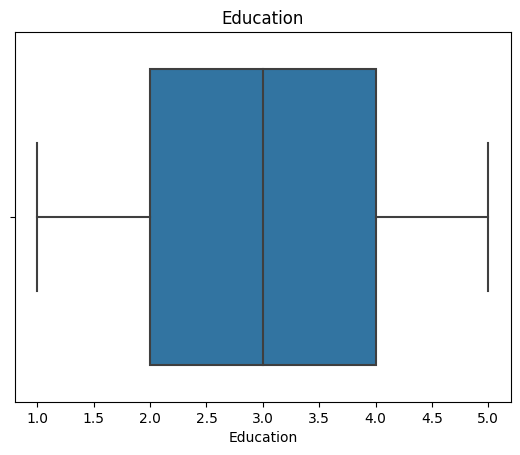

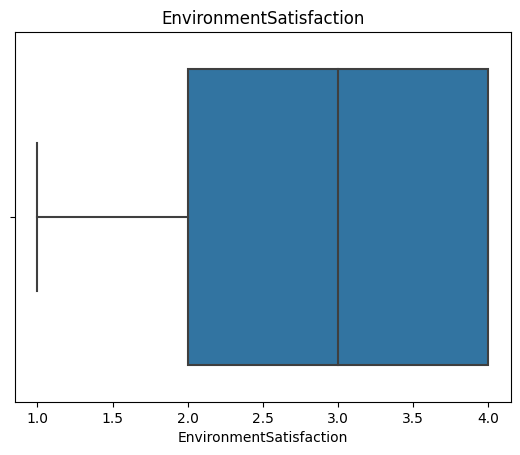

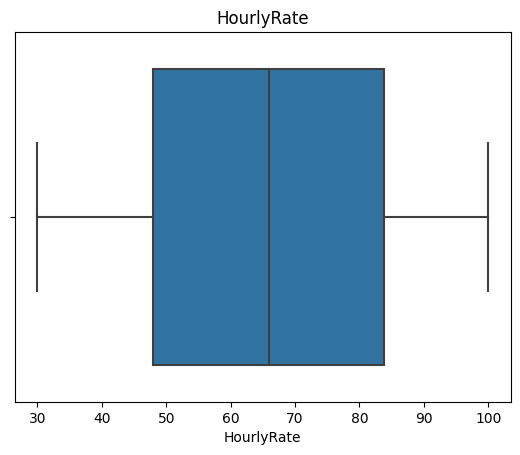

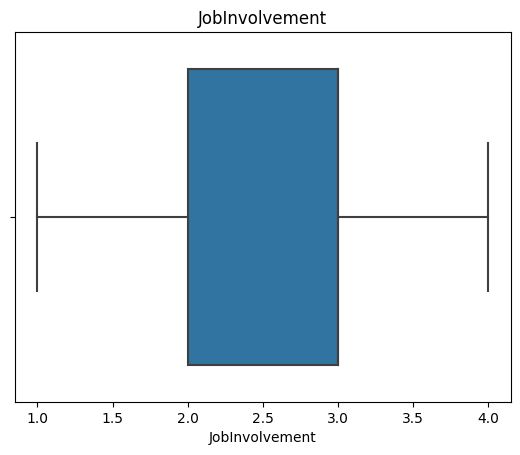

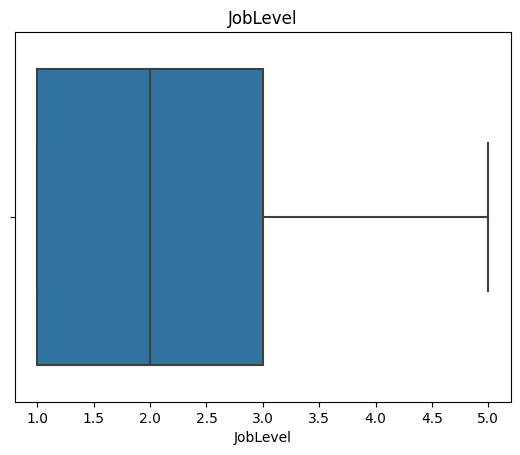

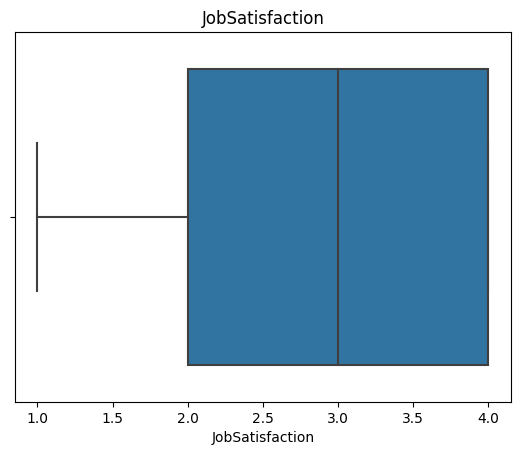

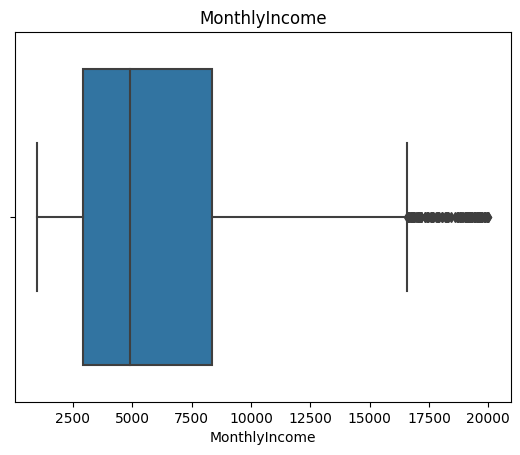

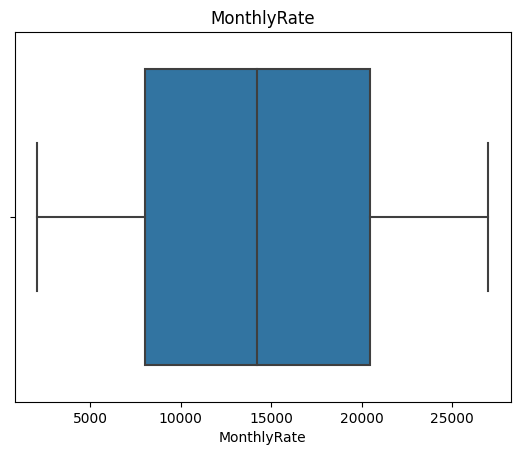

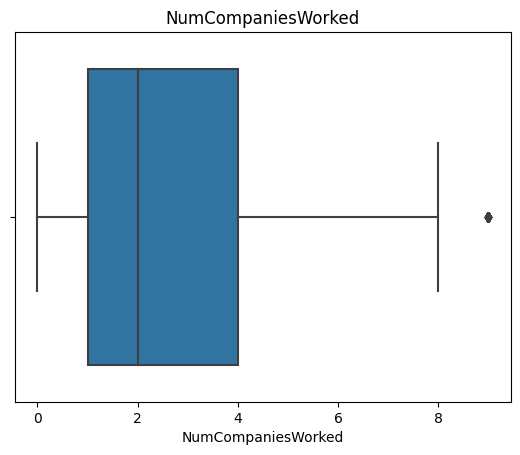

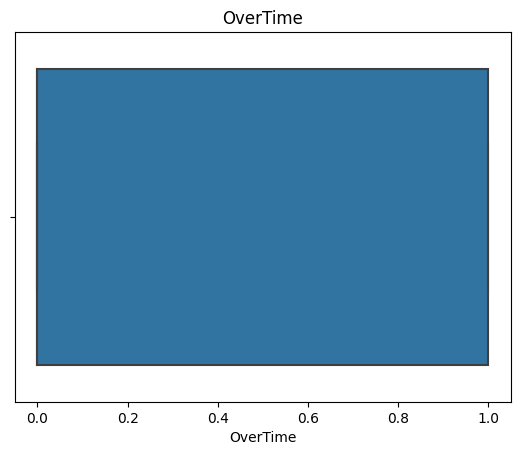

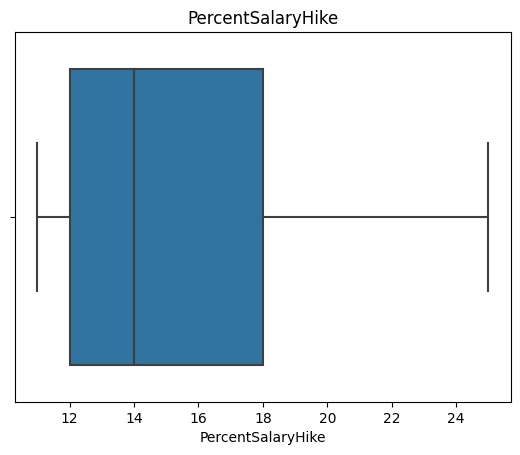

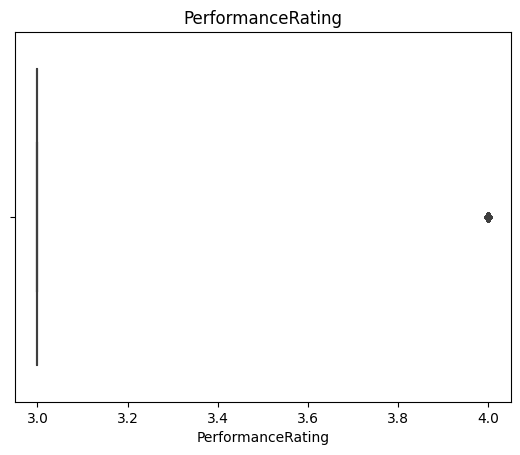

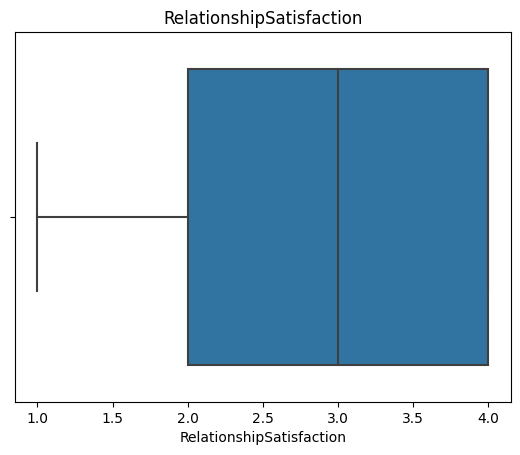

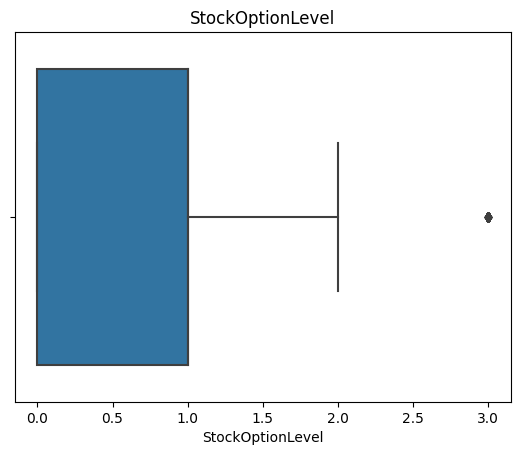

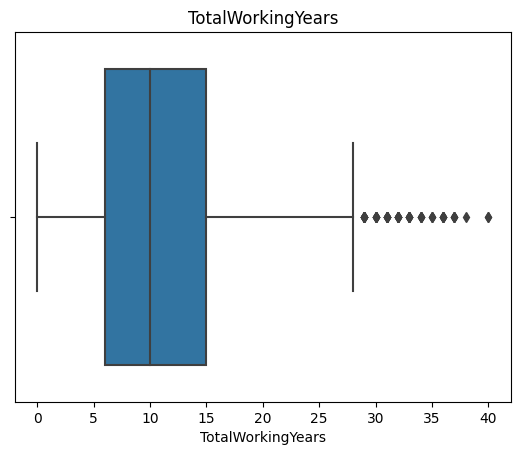

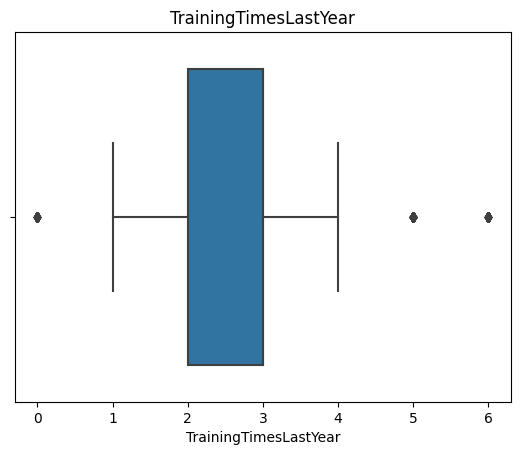

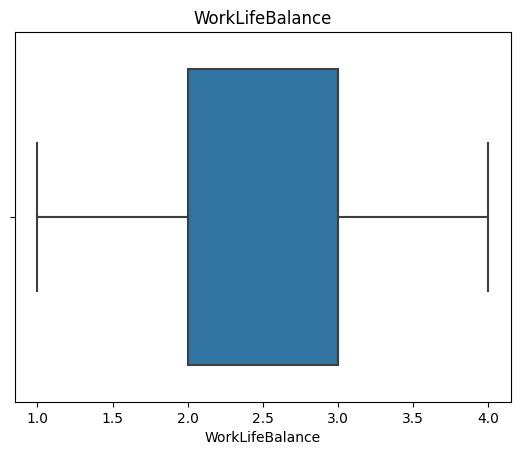

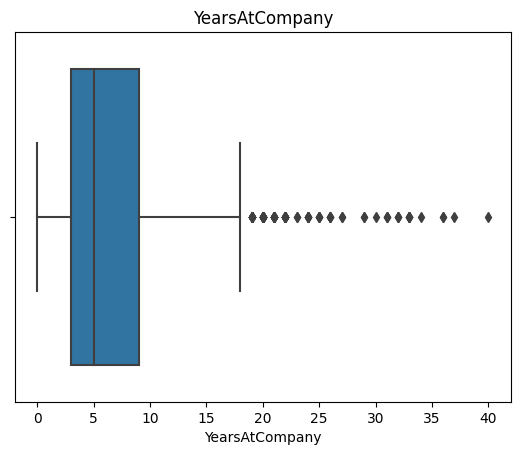

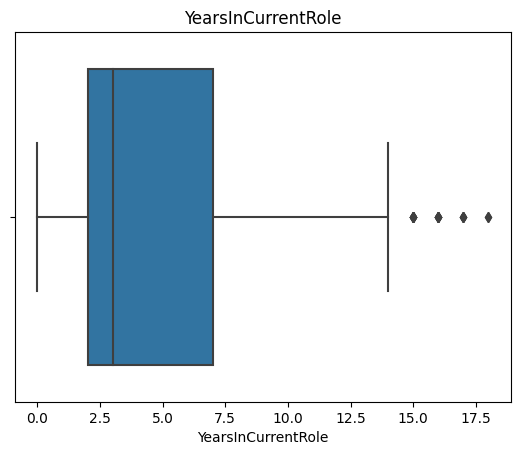

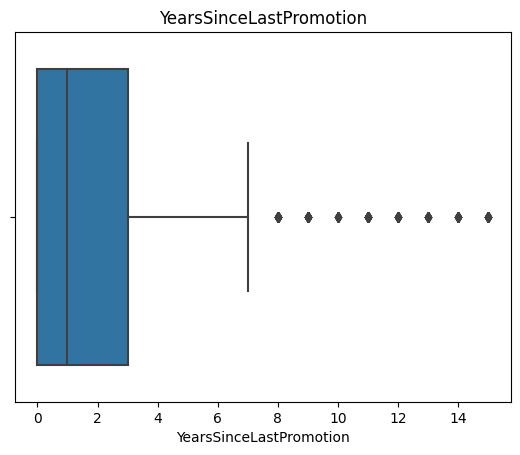

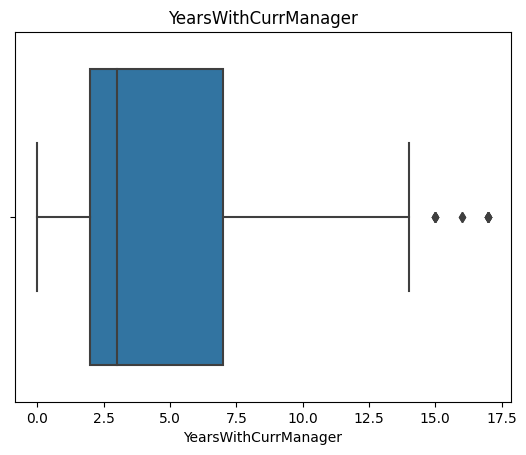

In [119]:
#check data distribution for numerical features
for i in df.select_dtypes(exclude='O'):
    sns.boxplot(x=df[i],data=df)
    plt.title(i)
    plt.show()

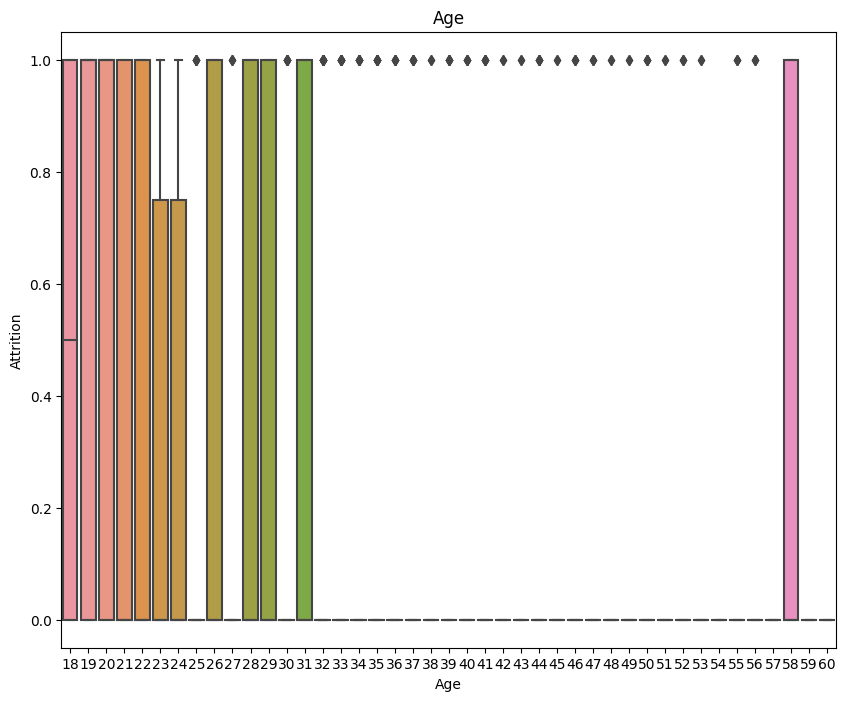

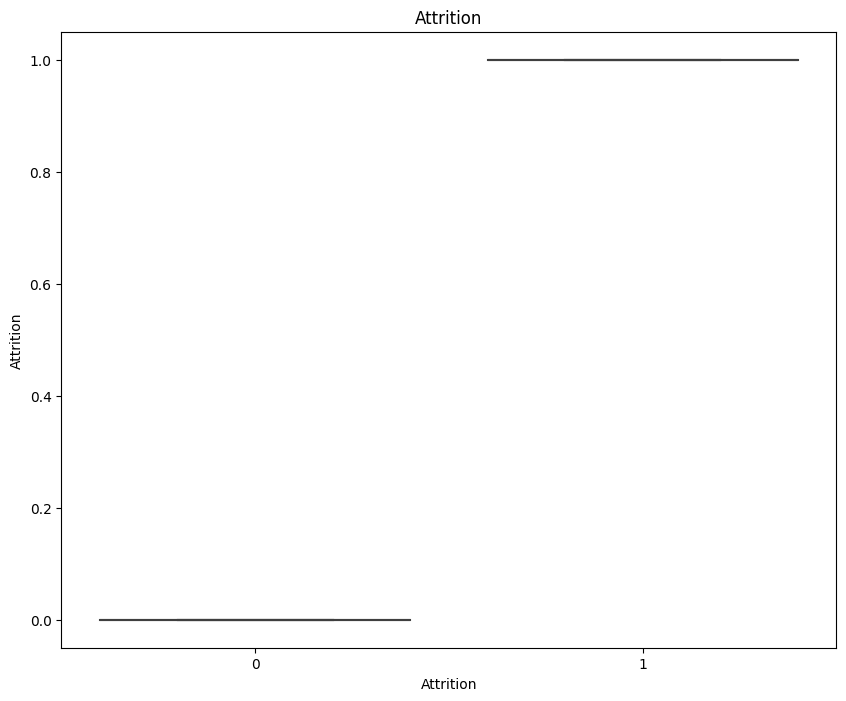

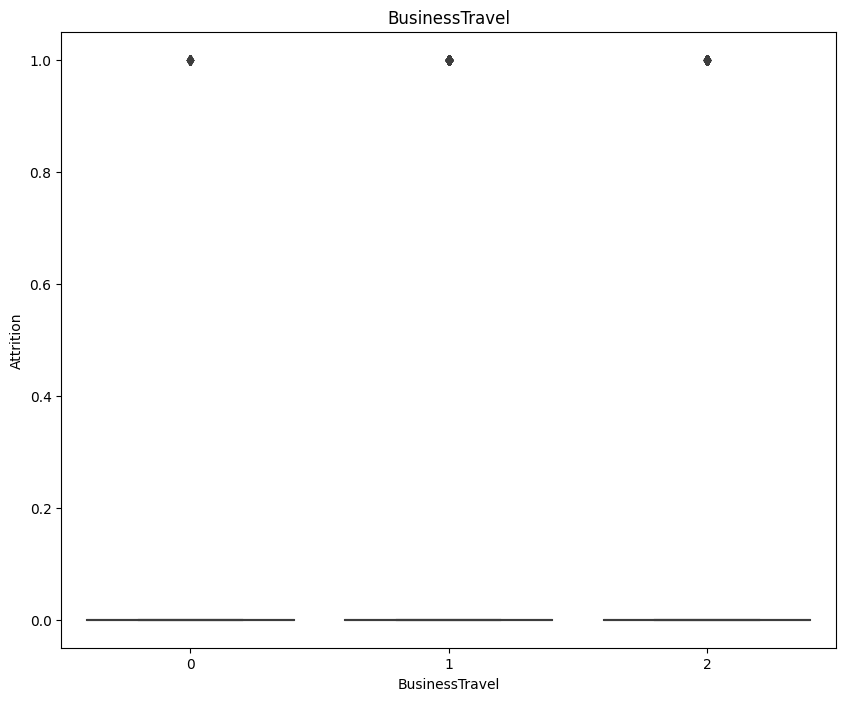

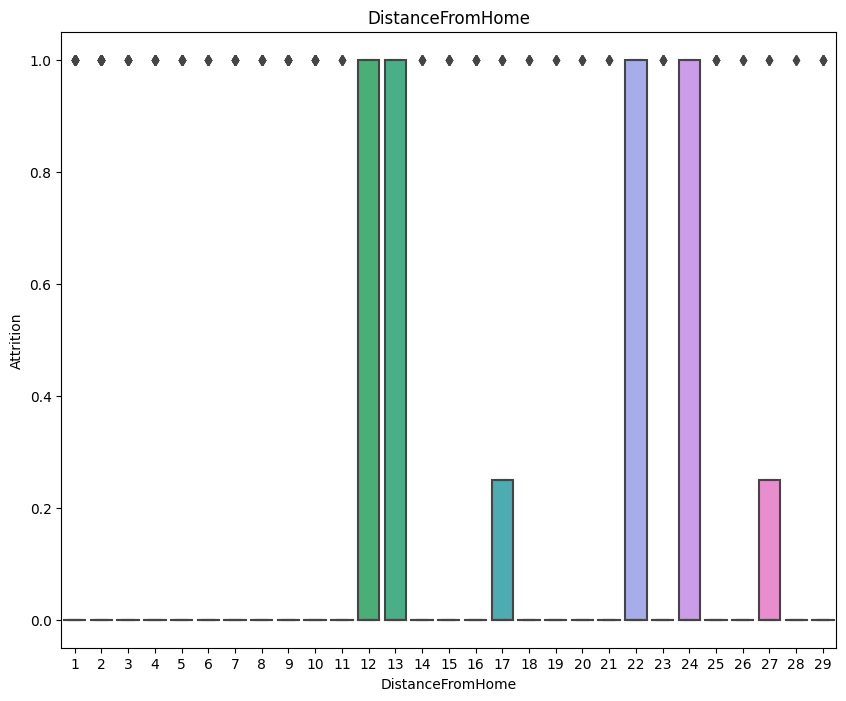

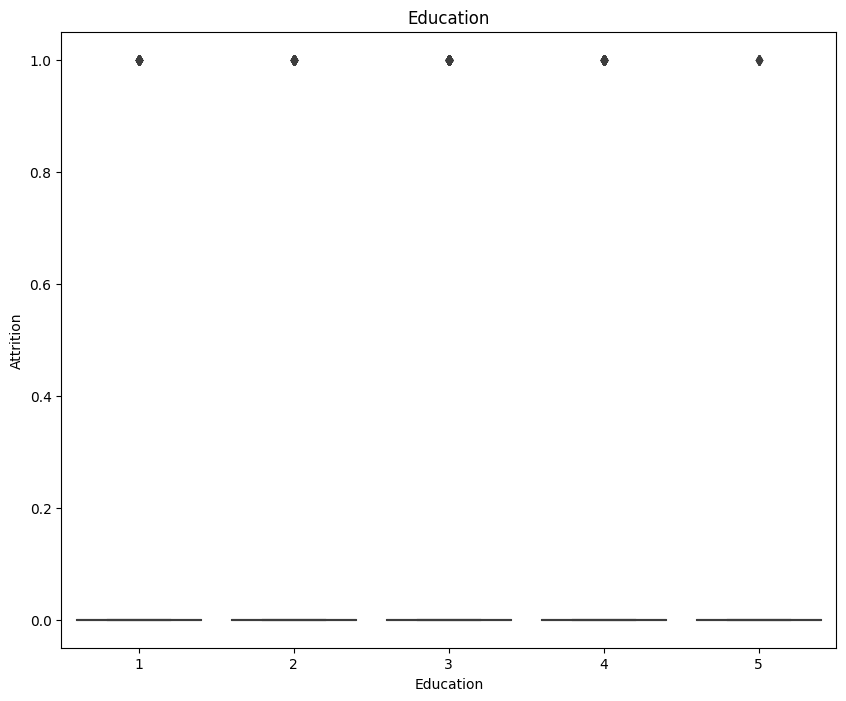

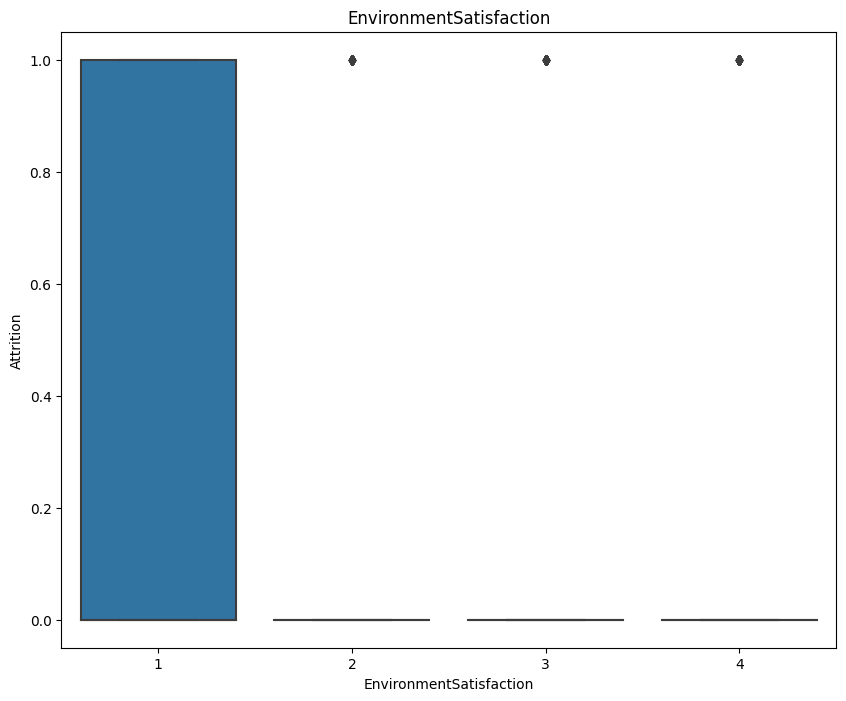

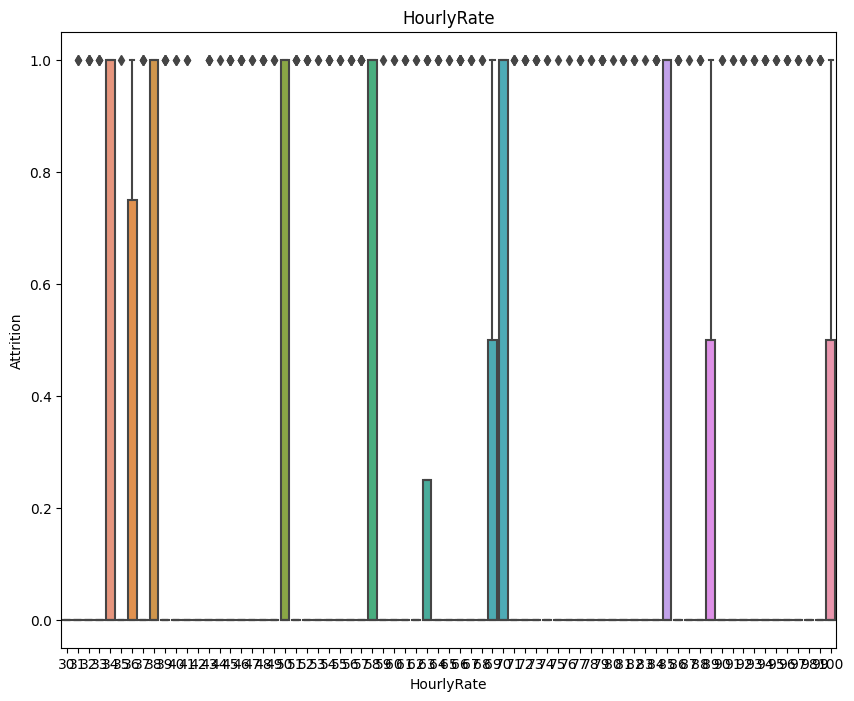

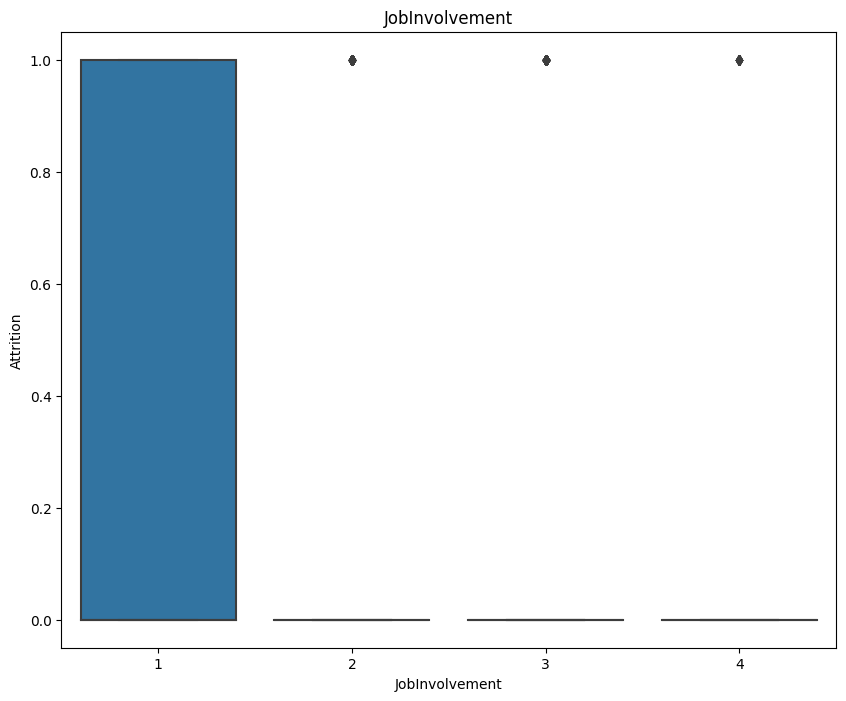

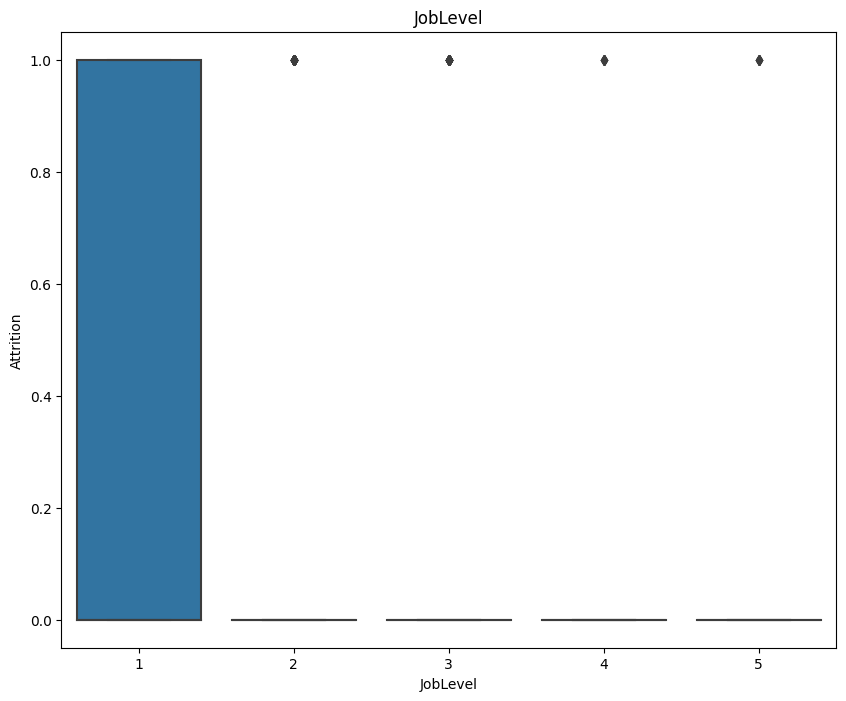

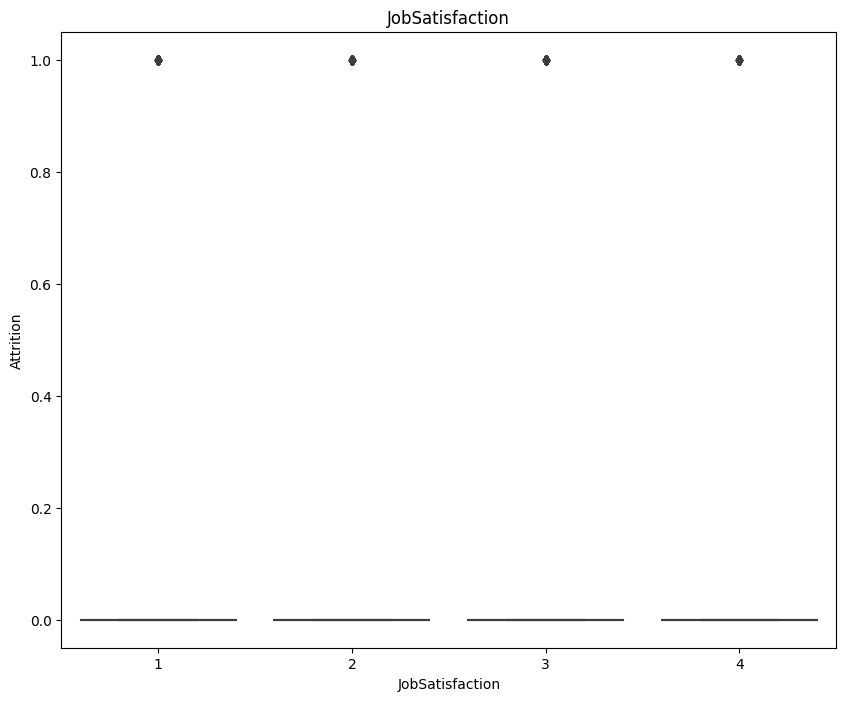

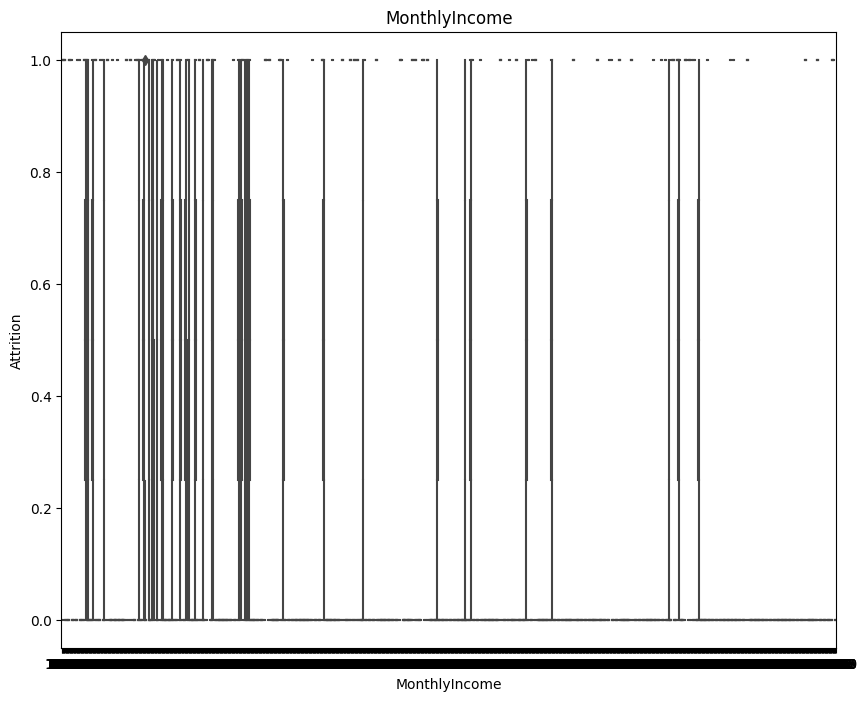

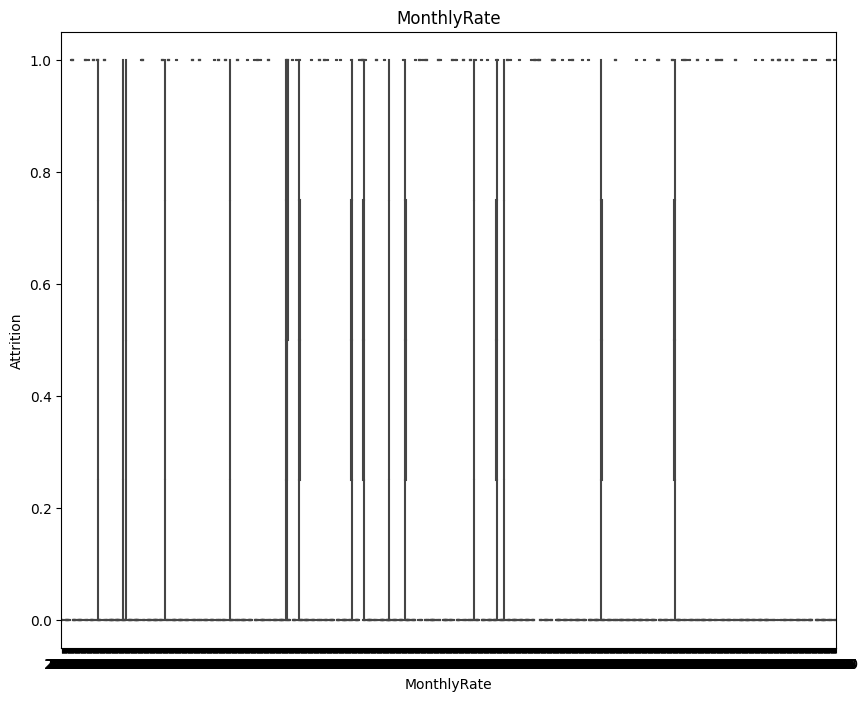

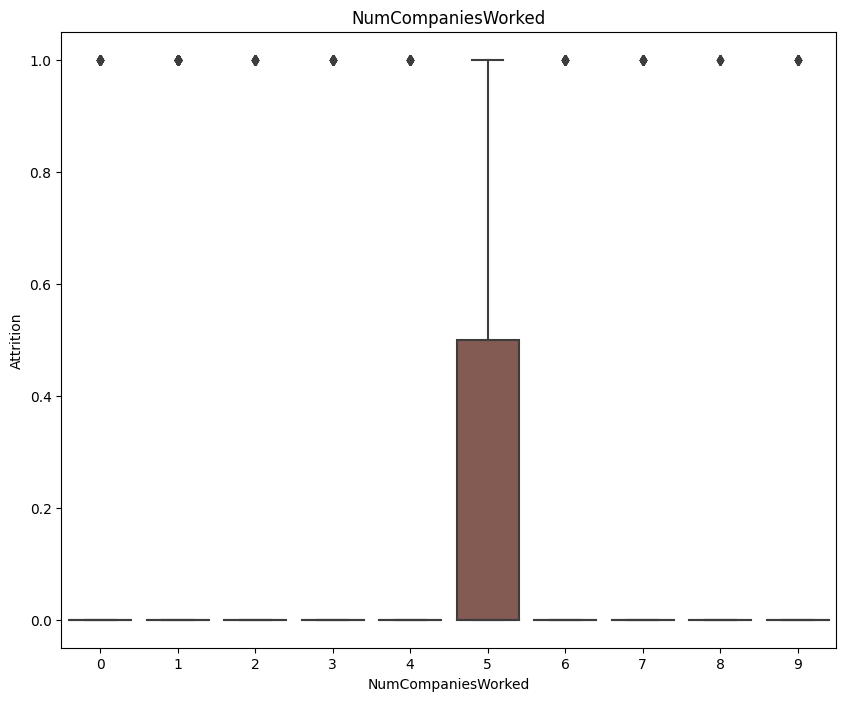

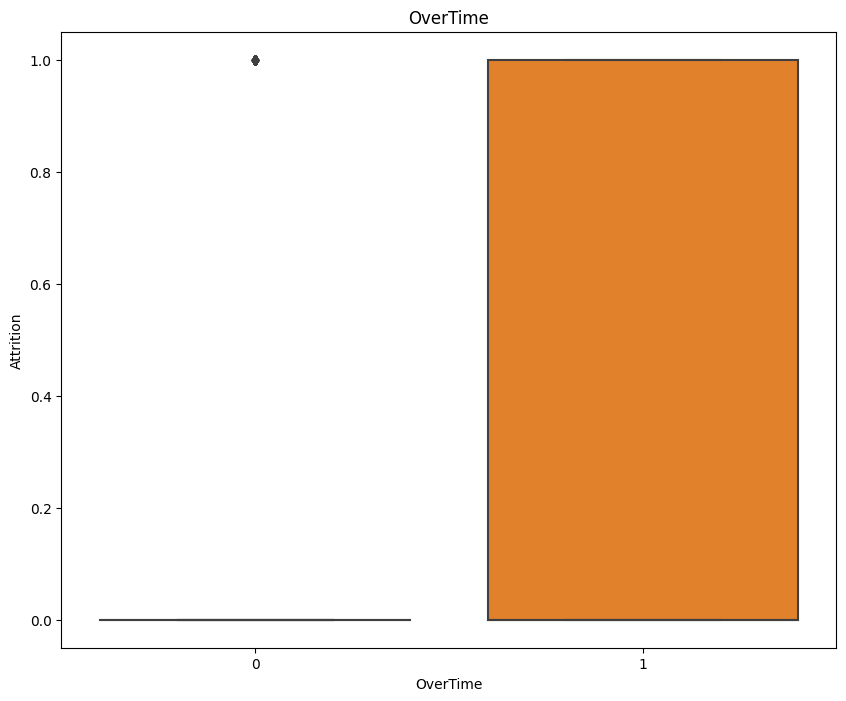

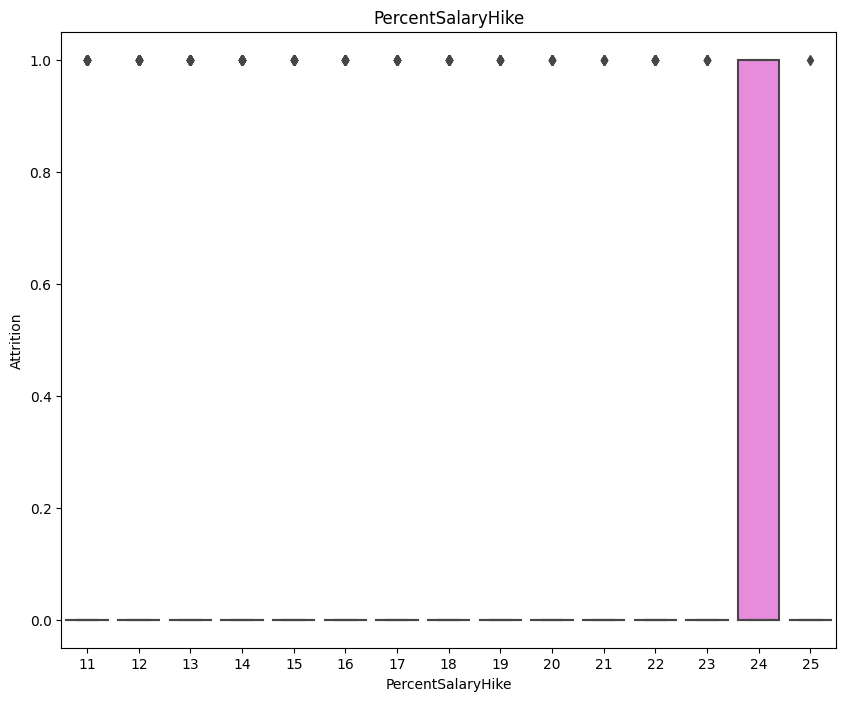

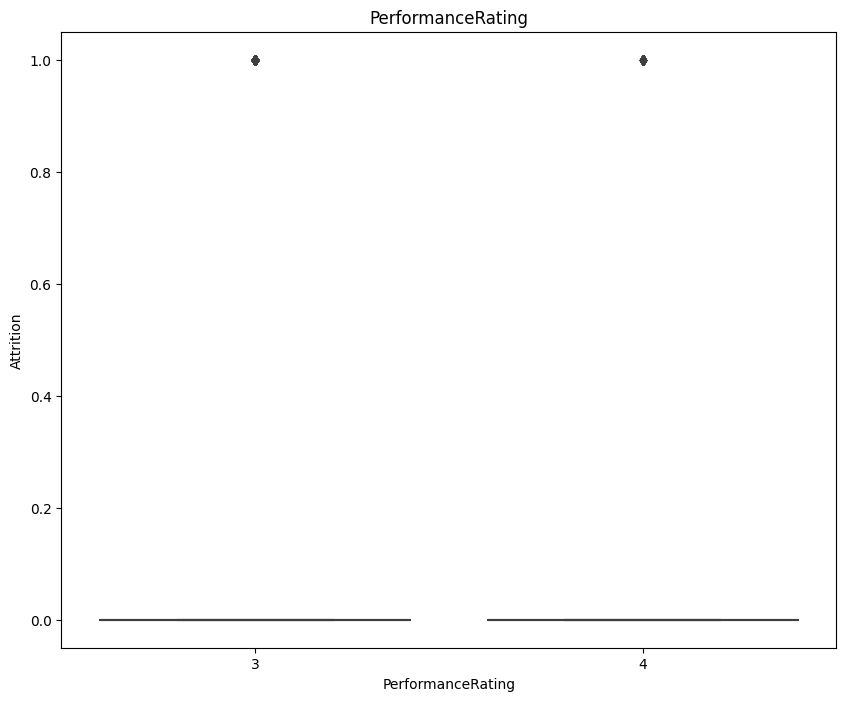

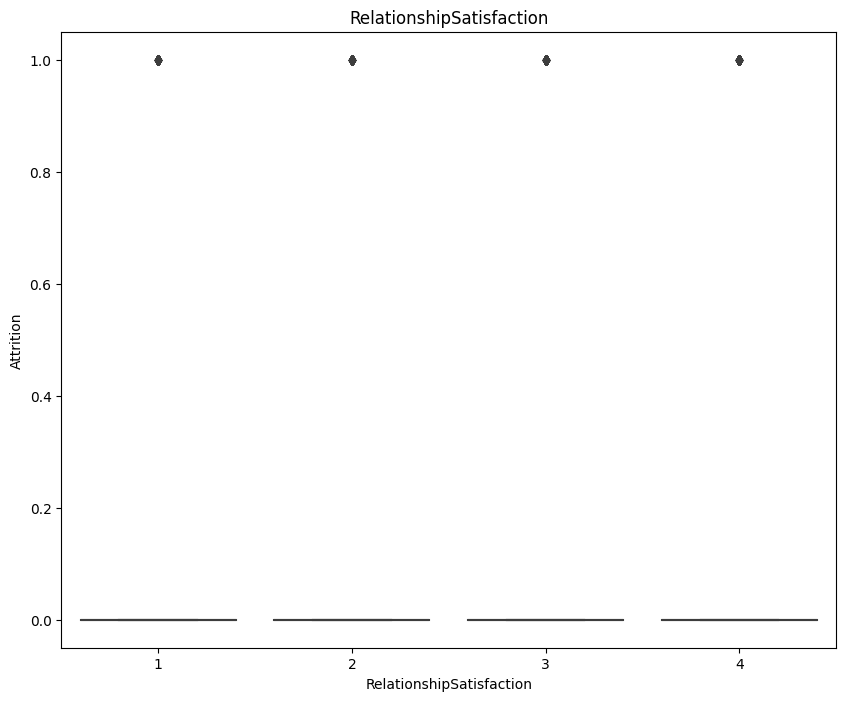

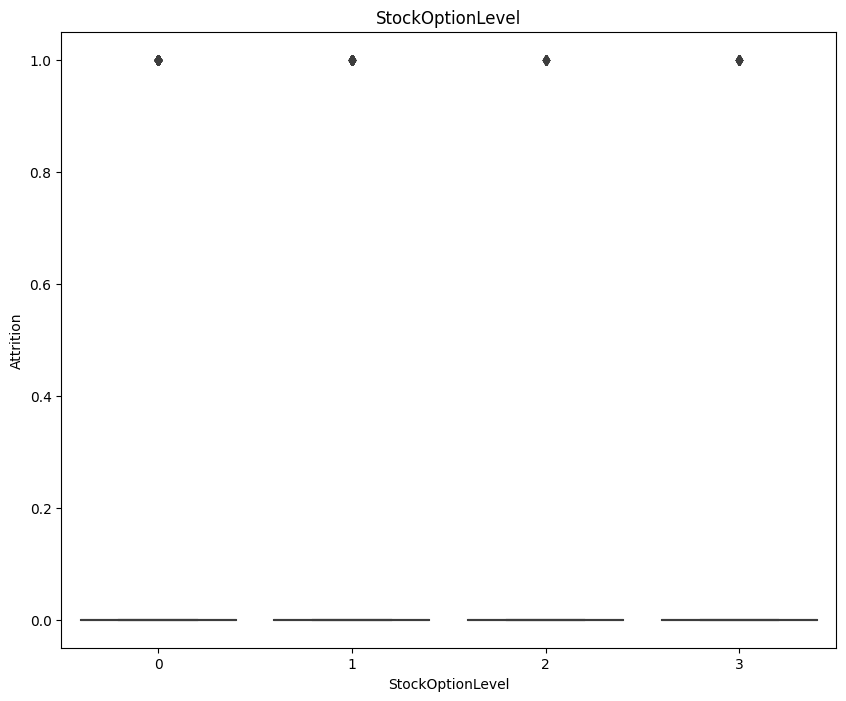

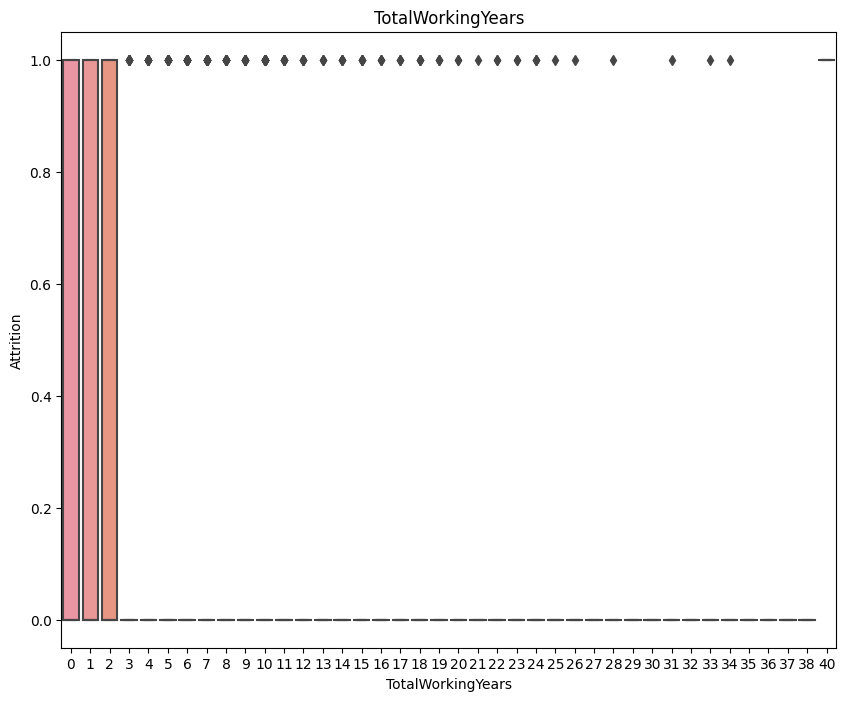

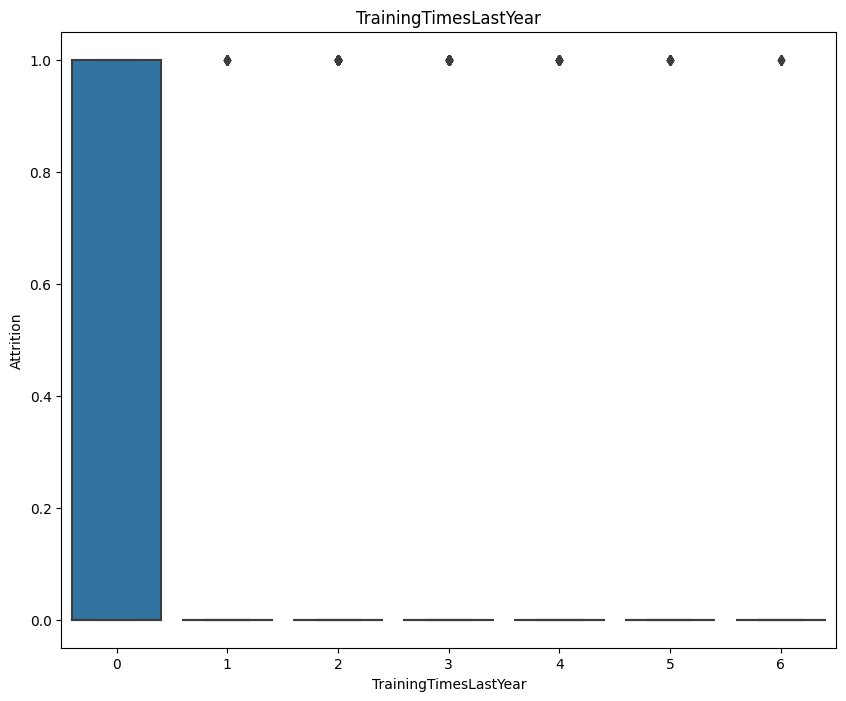

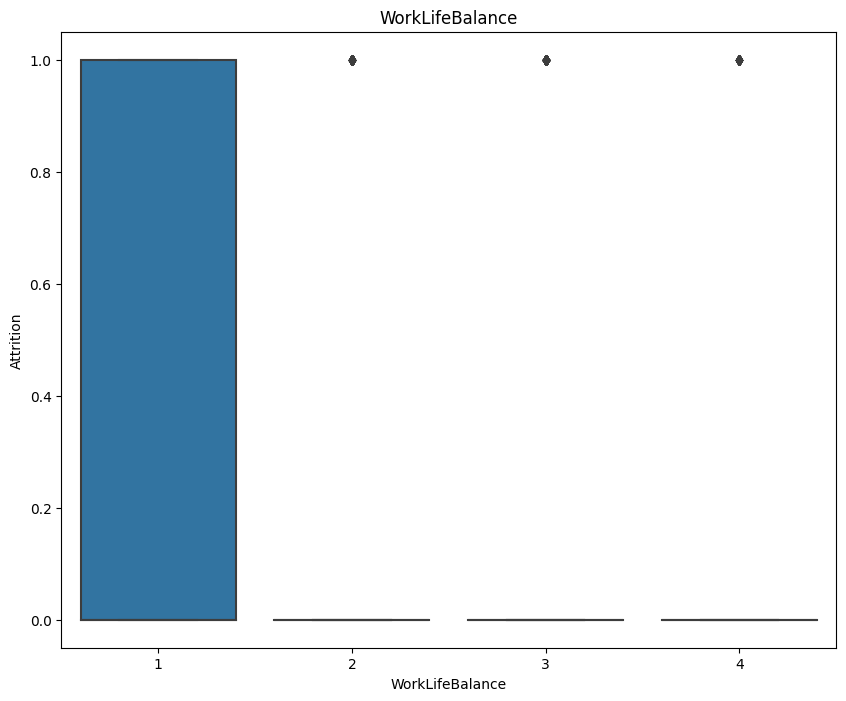

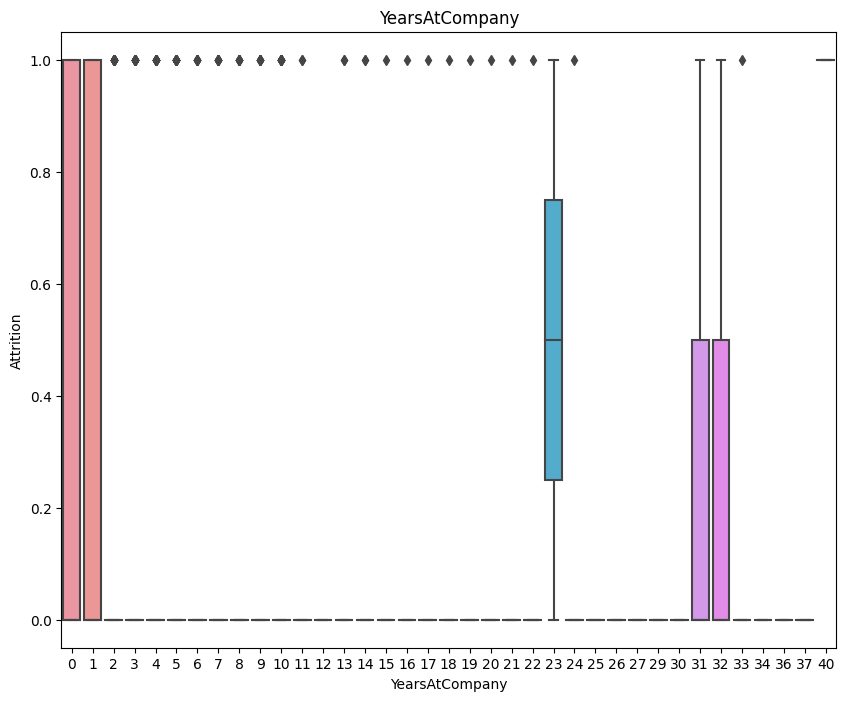

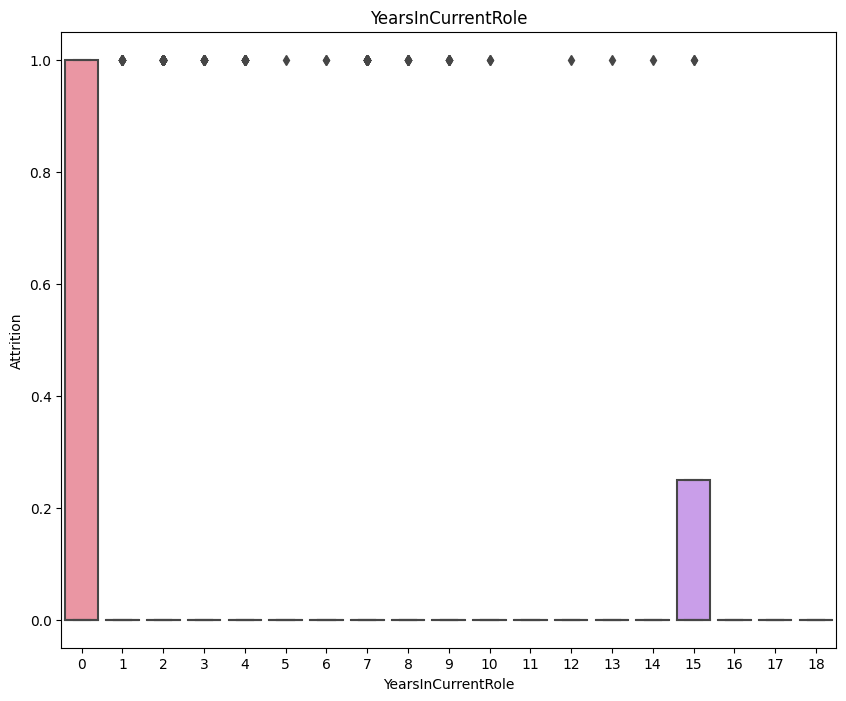

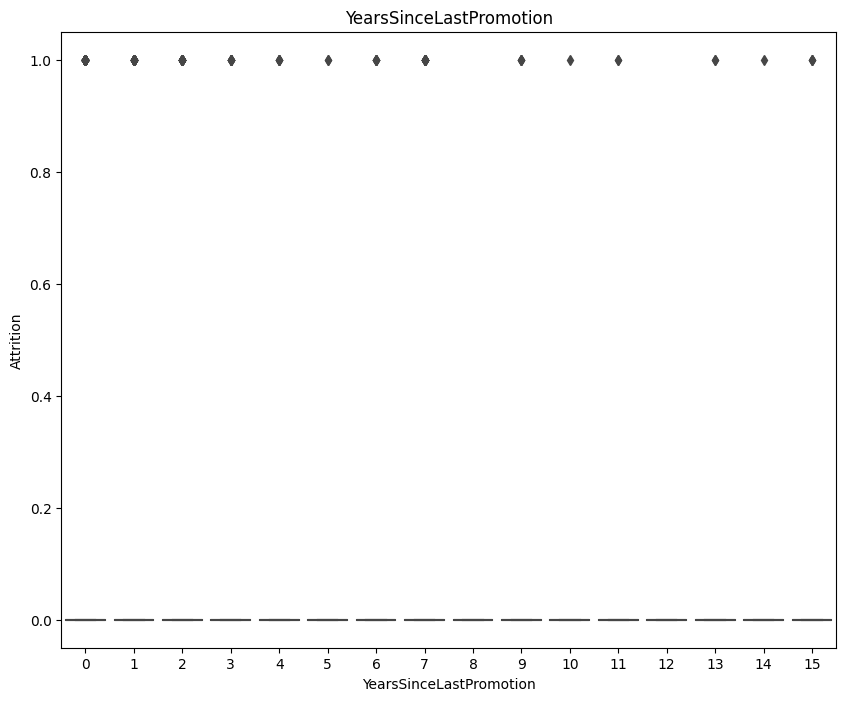

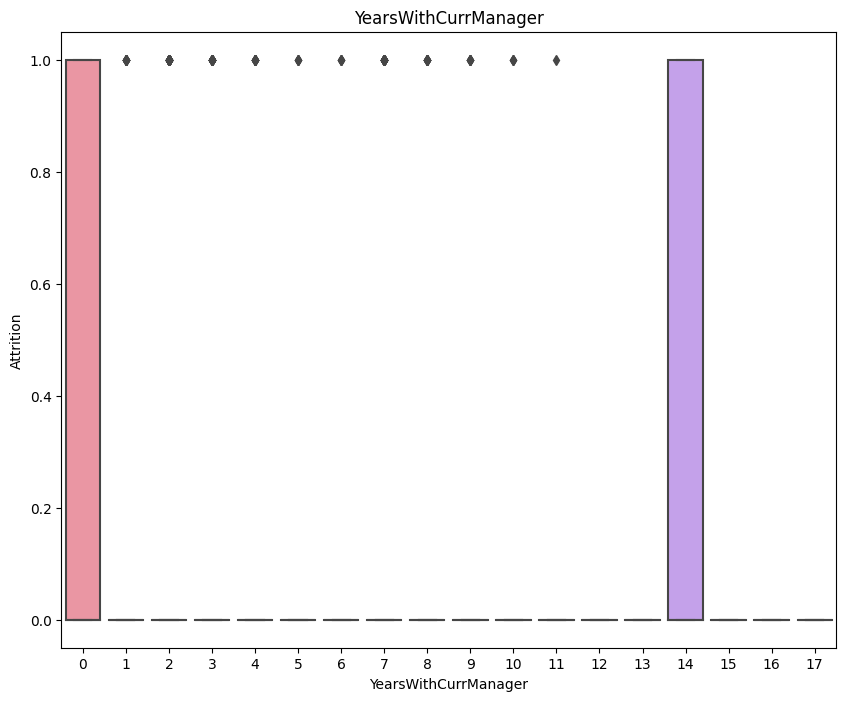

In [120]:
#check data distribution for numerical features with attrition distinction 

for i in df.select_dtypes(exclude='O'):
    plt.figure(figsize=(10,8))
    sns.boxplot(x=df[i],data=df,y='Attrition')
    plt.title(i)
    plt.show()

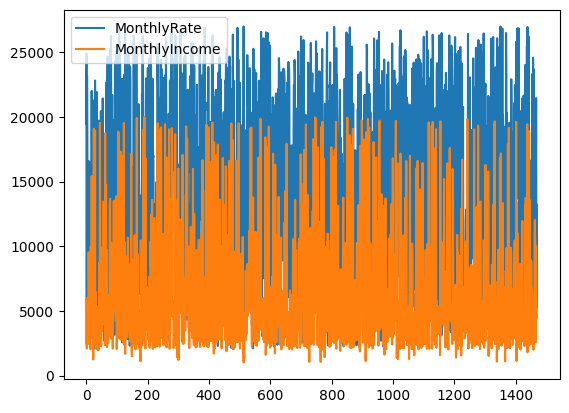

In [121]:
plt.plot(df['MonthlyRate'])
plt.plot(df['MonthlyIncome'])
plt.legend(['MonthlyRate','MonthlyIncome'])
plt.show()

In [123]:
new_attrition_values = {'Yes':1, 'No':0}

df['Attrition'] = df['Attrition'].map(new_attrition_values)

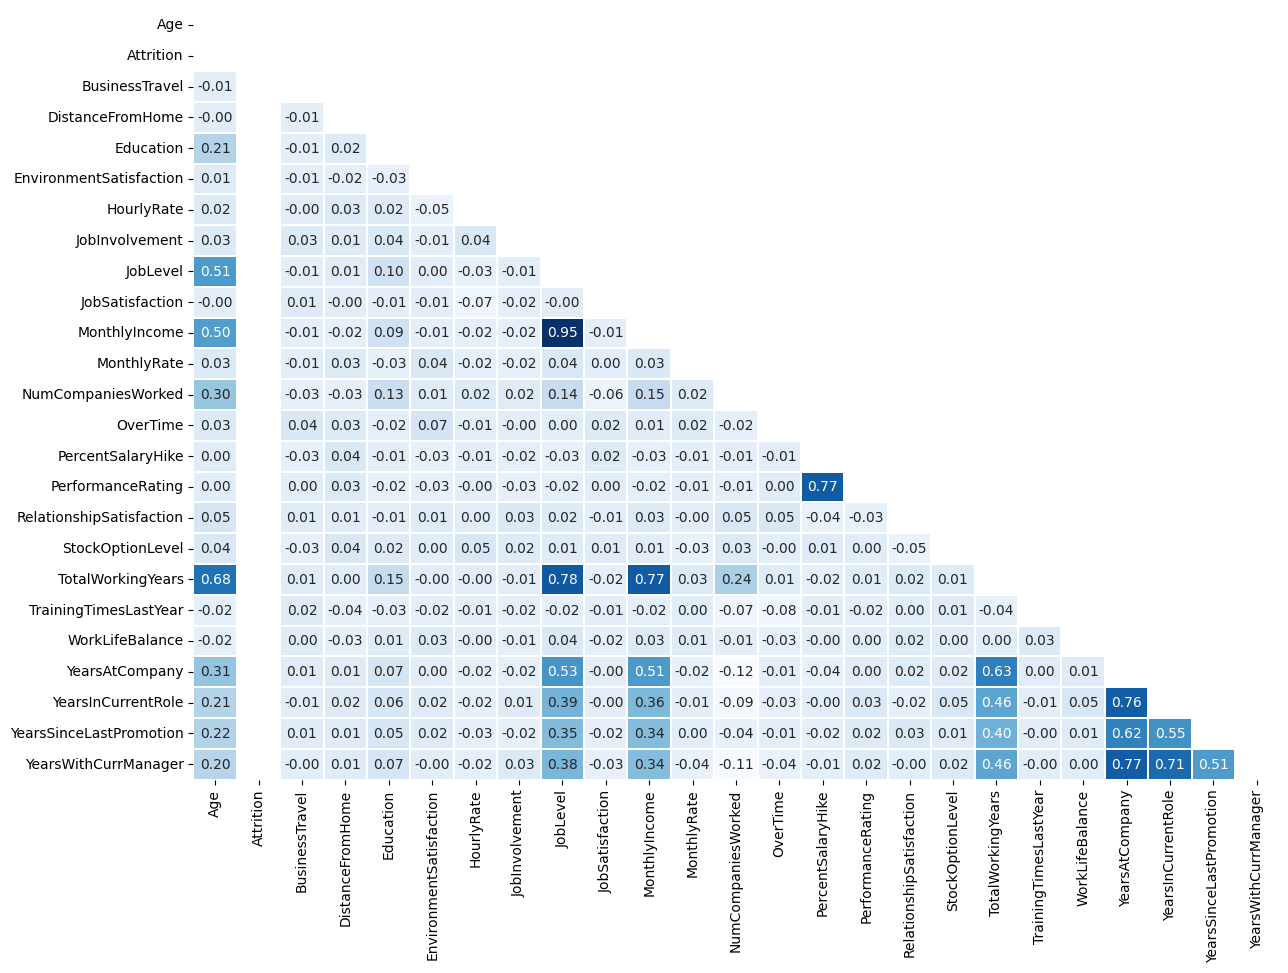

In [124]:
#check the correlation between the features 
corr = df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(14,10))
sns.heatmap(data=corr, fmt=".2f",annot=True,linewidths=0.1, mask=mask, cmap="Blues",cbar=False)
plt.show()

In [38]:
#splitting the data 
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
categorical_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
                'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
numerical_cols = ['Age','BusinessTravel', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                  'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                  'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [47]:
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

In [48]:
X_train_over, y_train_over = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

In [43]:
# Create transformers for each type of feature
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first', sparse=False)  # Use drop='first' to handle multicollinearity
)

ordinal_transformer = make_pipeline(
    OrdinalEncoder()
)

numerical_transformer = make_pipeline(
    StandardScaler()
)

# Create a column transformer to apply the appropriate transformations to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
    ])

# Combine the preprocessing steps and logistic regression into a single pipeline
lr = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42)
)

# Combine the preprocessing steps and random forest into a single pipeline
rf = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

# Combine the preprocessing steps and decision tree into a single pipeline
dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)

# Combine the preprocessing steps and KNN into a single pipeline
knn = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

In [46]:
# For each pipeline, cross-validate the model on the training data and report the mean accuracy and standard deviation
pipelines = [lr, rf, dt, knn]
for pipe in pipelines:
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{pipe.steps[-1][1]}: {scores.mean():.4f} +/- {scores.std():.4f}')

LogisticRegression(random_state=42): 0.8684 +/- 0.0194
RandomForestClassifier(random_state=42): 0.8521 +/- 0.0055
DecisionTreeClassifier(random_state=42): 0.7795 +/- 0.0175
KNeighborsClassifier(): 0.8421 +/- 0.0120


In [49]:
for pipe in pipelines:
    scores = cross_val_score(pipe, X_train_over, y_train_over, cv=5, scoring='accuracy')
    print(f'{pipe.steps[-1][1]}: {scores.mean():.4f} +/- {scores.std():.4f}')

LogisticRegression(random_state=42): 0.7809 +/- 0.0116
RandomForestClassifier(random_state=42): 0.9759 +/- 0.0097
DecisionTreeClassifier(random_state=42): 0.9173 +/- 0.0082
KNeighborsClassifier(): 0.8094 +/- 0.0188


In [50]:
# For each pipeline, cross-validate the model on the training data and report the mean accuracy and standard deviation
pipelines = [lr, rf, dt, knn]
for pipe in pipelines:
    scores = cross_val_score(pipe, X_train_under, y_train_under, cv=5, scoring='accuracy')
    print(f'{pipe.steps[-1][1]}: {scores.mean():.4f} +/- {scores.std():.4f}')

LogisticRegression(random_state=42): 0.7276 +/- 0.0258
RandomForestClassifier(random_state=42): 0.6827 +/- 0.0462
DecisionTreeClassifier(random_state=42): 0.5980 +/- 0.0444
KNeighborsClassifier(): 0.6324 +/- 0.0305


In [51]:
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9021739130434783

In [52]:
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8695652173913043

In [53]:
model = dt.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8016304347826086

In [54]:
model = knn.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.8722826086956522

In [55]:
rf_better = GridSearchCV(
    rf,
    param_grid={
        'randomforestclassifier__n_estimators': [100, 200, 300],
        'randomforestclassifier__max_depth': [None, 5, 10, 15],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 5]
    },
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [56]:
rf_better.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'BusinessTravel',
                                                                          'DistanceFromHome',
                                                                          'HourlyRate',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                                                                          'PercentSalaryHike',
                                                                          'TotalWorkingYears',
                                                                          'TrainingTimesLastYear',
                                                                          'YearsAtCompany',
                                                                          'Yea...
                                                                          'WorkLifeBalance'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 5, 10, 15],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 5],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='accuracy', verbose=1)

In [57]:
rf_better.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 300}

In [58]:
rf_better.score(X_test, y_test)

0.8668478260869565

In [59]:
lr_better = GridSearchCV(
    lr,
    param_grid={
        'logisticregression__C': [0.1, 1, 10, 100],
        'logisticregression__solver': ['lbfgs', 'liblinear']
    },
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [60]:
lr_better.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'BusinessTravel',
                                                                          'DistanceFromHome',
                                                                          'HourlyRate',
                                                                          'MonthlyIncome',
                                                                          'MonthlyRate',
                                                                          'NumCompaniesWorked',
                                                                          'PercentSalaryHike',
                                                                          'TotalWorkingYears',
                                                                          'TrainingTimesLastYear',
                                                                          'YearsAtCompany',
                                                                          'Yea...
                                                                          'EnvironmentSatisfaction',
                                                                          'JobInvolvement',
                                                                          'JobLevel',
                                                                          'JobSatisfaction',
                                                                          'PerformanceRating',
                                                                          'RelationshipSatisfaction',
                                                                          'StockOptionLevel',
                                                                          'WorkLifeBalance'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10, 100],
                         'logisticregression__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [61]:
lr_better.best_params_

{'logisticregression__C': 0.1, 'logisticregression__solver': 'lbfgs'}

In [62]:
lr_better.score(X_test, y_test)

0.9021739130434783

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix(y_test, lr_better.predict(X_test))

array([[315,   5],
       [ 31,  17]], dtype=int64)

In [64]:
final_model = make_pipeline(
    preprocessor,
    LogisticRegression(C=1,solver='liblinear',random_state=42)
)

In [65]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BusinessTravel',
                                                   'DistanceFromHome',
                                                   'HourlyRate',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'TrainingTimesLastYear',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSince...
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                                                   'StockOptionLevel',
                                                   'WorkLifeBalance'])])),
                ('logisticregression',
                 LogisticRegression(C=1, random_state=42, solver='liblinear'))])

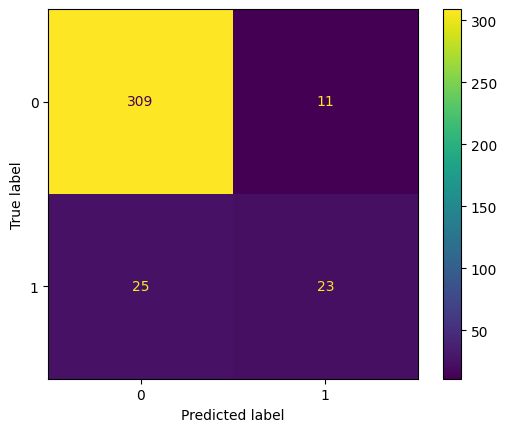

In [66]:
ConfusionMatrixDisplay.from_estimator(final_model,X_test,y_test)

In [67]:
final_model.score(X_test, y_test)

0.9021739130434783

<Axes: >

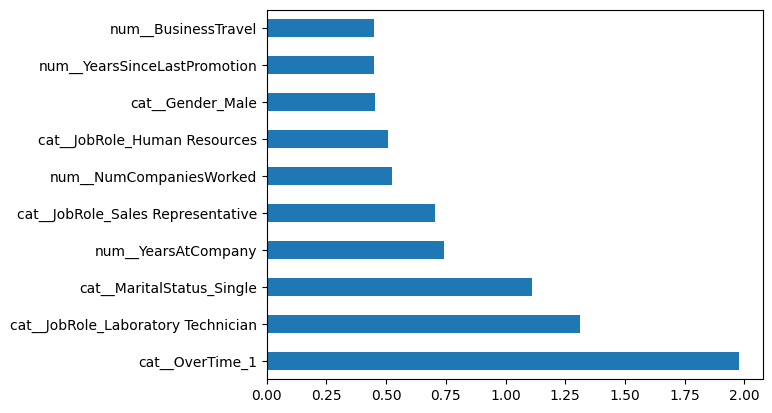

In [68]:
# the top 10 features that are most important in predicting attrition and plot it
importances = final_model.named_steps['logisticregression'].coef_[0]
features = final_model.named_steps['columntransformer'].get_feature_names_out()
features = np.append(features, numerical_cols)

# Check if the length of importances matches the length of features
if len(importances) < len(features):
    # If there are missing feature importances, set them to zero
    missing_importances = np.zeros(len(features) - len(importances))
    importances = np.concatenate((importances, missing_importances))

feat_importances = pd.Series(importances, index=features)
feat_importances.nlargest(10).plot(kind='barh')